# Gramener Case Study Program

In [289]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [290]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set(style="white")

In [291]:
# Import the dataset
loan = pd.read_csv("loan.csv")

In [292]:
# Inspecting the dataset
print(loan.shape)
print("*****************************")
print(loan.info())
print("*****************************")
print(loan.describe(include = 'all'))

(39717, 111)
*****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
*****************************
                  id     member_id     loan_amnt   funded_amnt  \
count   3.971700e+04  3.971700e+04  39717.000000  39717.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std     2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min     5.473400e+04  7.069900e+04    500.000000    500.000000   
25%     5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%     6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%     8.377550e+05  1.047339e+06  15000.000000  15000.000000   

In [293]:
#checking the null percentage
round(100*(loan.isnull().sum()/ len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [294]:
#dropping columns with all values as null
loan.dropna(axis = 1, how = "all", inplace = True)

In [295]:
#checking the null percentage again
round(100*(loan.isnull().sum()/ len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [296]:
#since mths_since_last_record and next_pymnt_d, mths_since_last_delinq have null values greater than 60% , deleting them
loan = loan.drop(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_delinq'], axis = 1)

In [297]:
#since desc is a string and has highly random words, deleting it too
loan = loan.drop('desc', axis = 1)

In [298]:
#Checking for number of unique values in each column in dataset
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [299]:
#since the columns with single unique values will not help in analysis, hence deleting them.
loan = loan.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis = 1)


In [300]:
# id and url columns has different values for each row in dataset, hence deleting them
loan = loan.drop(['id', 'url'], axis = 1)

In [301]:
#deleting columns which may not help in analysis
loan = loan.drop(['emp_title','installment','earliest_cr_line','revol_bal', 'revol_util','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec','total_acc', 'pub_rec_bankruptcies', 'title', 'out_prncp','out_prncp_inv'], axis=1)

In [302]:
loan.nunique()

member_id              39717
loan_amnt                885
funded_amnt             1041
funded_amnt_inv         8205
term                       2
int_rate                 371
grade                      7
sub_grade                 35
emp_length                11
home_ownership             5
annual_inc              5318
verification_status        3
issue_d                   55
loan_status                3
purpose                   14
zip_code                 823
addr_state                50
dti                     2868
dtype: int64

In [303]:
round(100*(loan.isnull().sum()/ len(loan.index)),2)

member_id              0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [304]:
loan.head(20)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,1296599,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65
1,1314167,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00
2,1313524,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72
3,1277178,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00
4,1311748,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,972xx,OR,17.94
5,1311441,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20
6,1304742,7000,7000,7000.0,60 months,15.96%,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51
7,1288686,3000,3000,3000.0,36 months,18.64%,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35
8,1306957,5600,5600,5600.0,60 months,21.28%,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,958xx,CA,5.55
9,1306721,5375,5375,5350.0,60 months,12.69%,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,774xx,TX,18.08


In [305]:
# Getting the numeric value of term and changing the datatype of the column
term = loan['term'].str.split(' ', expand = True)
loan['term'] = term[1]
loan['term'] = pd.to_numeric(loan['term'])

In [306]:
# Getting the numeric value of emp_length
length = loan['emp_length'].str.split('y', expand = True)
loan['emp_length'] = length[0].str.strip()

In [307]:
#Extracting month and year from issue_d column as it may help in analysis
issue_month = loan['issue_d'].str.split('-', expand = True)
loan['issue_d_month']=  issue_month[0]
loan['issue_d_year'] = issue_month[1]

In [308]:
##Extracting interest rate without % sign from int_rate column
int_rate = loan['int_rate'].str.split('%', expand = True)
loan['int_rate'] = int_rate[0].str.strip()
loan['int_rate'] = pd.to_numeric(loan['int_rate'])

In [309]:
loan.head(20)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,issue_d_month,issue_d_year
0,1296599,5000,5000,4975.0,36,10.65,B,B2,10+,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,Dec,11
1,1314167,2500,2500,2500.0,60,15.27,C,C4,< 1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,Dec,11
2,1313524,2400,2400,2400.0,36,15.96,C,C5,10+,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,Dec,11
3,1277178,10000,10000,10000.0,36,13.49,C,C1,10+,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,Dec,11
4,1311748,3000,3000,3000.0,60,12.69,B,B5,1,RENT,80000.00,Source Verified,Dec-11,Current,other,972xx,OR,17.94,Dec,11
5,1311441,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,Dec,11
6,1304742,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,Dec,11
7,1288686,3000,3000,3000.0,36,18.64,E,E1,9,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35,Dec,11
8,1306957,5600,5600,5600.0,60,21.28,F,F2,4,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,958xx,CA,5.55,Dec,11
9,1306721,5375,5375,5350.0,60,12.69,B,B5,< 1,RENT,15000.00,Verified,Dec-11,Charged Off,other,774xx,TX,18.08,Dec,11


In [310]:
loan.describe(include = "all")

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,issue_d_month,issue_d_year
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717,39717,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,39717,39717.000000,39717,39717
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,11,5,NaN,3,55,3,14,823,50,NaN,12,5
top,NaN,NaN,NaN,NaN,NaN,NaN,B,B3,10+,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,100xx,CA,NaN,Dec,11
freq,NaN,NaN,NaN,NaN,NaN,NaN,12020,2917,8879,18899,NaN,16921,2260,32950,18641,597,7099,NaN,4433,21656
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,NaN,NaN
std,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,NaN,NaN
min,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,NaN,NaN,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,NaN,NaN
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,NaN,NaN
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,NaN,NaN,NaN,NaN,8.230000e+04,NaN,NaN,NaN,NaN,NaN,NaN,18.600000,NaN,NaN


In [311]:
#since loan_amt, funded_amt, funded_amt_inv has a value of range between 0-35000 
#hence dividing them into bins of 0-10k, 10-20k, 20-30k, 30-40k
buckets =  list(range(0,41000,10000))
labels = ['<10k','10-20k','20-30k','30k+']
loan['loan_amnt_bucket'] = pd.cut(loan['loan_amnt'], bins=buckets, labels=labels, include_lowest=True, right=False)
loan['funded_amnt_bucket'] = pd.cut(loan['funded_amnt'], bins=buckets, labels=labels, include_lowest=True, right=False)
loan['funded_amnt_inv_bucket'] = pd.cut(loan['funded_amnt_inv'], bins=buckets, labels=labels, include_lowest=True, right=False)

In [312]:
#since int_rate has a value of range between 0-25 
#hence dividing them into bins of <5%, 5-10%, 10-15%, 15-20%, 20-25%, 25%+
buckets =  list(range(5,40,5))
labels = ['<5%','5-10%','10-15%','15-20%','20-25%','25%+']
loan['int_rate_bucket'] = pd.cut(loan['int_rate'], bins=buckets, labels=labels, include_lowest=True, right=False)

In [313]:
loan['annual_inc'].describe(percentiles = [0.1, 0.75, 0.95, 0.99])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
10%      3.000000e+04
50%      5.900000e+04
75%      8.230000e+04
95%      1.420000e+05
99%      2.349994e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

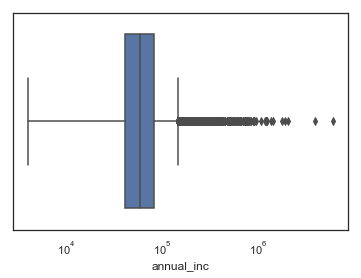

In [314]:
# As we can see 99 %ile of the values are below 2.35L and maximum value is 60L , there are outliers in the dataset
#Plotting a boxplot to . understand the same
sns.boxplot(loan['annual_inc'])
plt.xscale('log')

since 99%ile of the values lie below 2.35L considering bucket accordingly

In [315]:
#Creating the buckets for the annual_inc column
buckets =  [0, 60000, 150000, 3000000, 10000000]
labels = ['low','medium','high','very_high']
loan['annual_inc_bucket'] = pd.cut(loan['annual_inc'], bins=buckets, labels=labels, include_lowest=True, right=False)
loan.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,zip_code,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket
0,1296599,5000,5000,4975.0,36,10.65,B,B2,10+,RENT,...,860xx,AZ,27.65,Dec,11,<10k,<10k,<10k,5-10%,low
1,1314167,2500,2500,2500.0,60,15.27,C,C4,< 1,RENT,...,309xx,GA,1.00,Dec,11,<10k,<10k,<10k,10-15%,low
2,1313524,2400,2400,2400.0,36,15.96,C,C5,10+,RENT,...,606xx,IL,8.72,Dec,11,<10k,<10k,<10k,10-15%,low
3,1277178,10000,10000,10000.0,36,13.49,C,C1,10+,RENT,...,917xx,CA,20.00,Dec,11,10-20k,10-20k,10-20k,5-10%,low
4,1311748,3000,3000,3000.0,60,12.69,B,B5,1,RENT,...,972xx,OR,17.94,Dec,11,<10k,<10k,<10k,5-10%,medium
5,1311441,5000,5000,5000.0,36,7.90,A,A4,3,RENT,...,852xx,AZ,11.20,Dec,11,<10k,<10k,<10k,<5%,low
6,1304742,7000,7000,7000.0,60,15.96,C,C5,8,RENT,...,280xx,NC,23.51,Dec,11,<10k,<10k,<10k,10-15%,low
7,1288686,3000,3000,3000.0,36,18.64,E,E1,9,RENT,...,900xx,CA,5.35,Dec,11,<10k,<10k,<10k,10-15%,low
8,1306957,5600,5600,5600.0,60,21.28,F,F2,4,OWN,...,958xx,CA,5.55,Dec,11,<10k,<10k,<10k,15-20%,low
9,1306721,5375,5375,5350.0,60,12.69,B,B5,< 1,RENT,...,774xx,TX,18.08,Dec,11,<10k,<10k,<10k,5-10%,low


In [316]:
#Creating bucket for dti column
buckets =  list(range(0,45,10))
labels = ['<10','10-20','20-30','30+']
loan['dti_bucket'] = pd.cut(loan['dti'], bins=buckets, labels=labels, include_lowest=True, right=False)
loan.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,1296599,5000,5000,4975.0,36,10.65,B,B2,10+,RENT,...,AZ,27.65,Dec,11,<10k,<10k,<10k,5-10%,low,20-30
1,1314167,2500,2500,2500.0,60,15.27,C,C4,< 1,RENT,...,GA,1.00,Dec,11,<10k,<10k,<10k,10-15%,low,<10
2,1313524,2400,2400,2400.0,36,15.96,C,C5,10+,RENT,...,IL,8.72,Dec,11,<10k,<10k,<10k,10-15%,low,<10
3,1277178,10000,10000,10000.0,36,13.49,C,C1,10+,RENT,...,CA,20.00,Dec,11,10-20k,10-20k,10-20k,5-10%,low,20-30
4,1311748,3000,3000,3000.0,60,12.69,B,B5,1,RENT,...,OR,17.94,Dec,11,<10k,<10k,<10k,5-10%,medium,10-20
5,1311441,5000,5000,5000.0,36,7.90,A,A4,3,RENT,...,AZ,11.20,Dec,11,<10k,<10k,<10k,<5%,low,10-20
6,1304742,7000,7000,7000.0,60,15.96,C,C5,8,RENT,...,NC,23.51,Dec,11,<10k,<10k,<10k,10-15%,low,20-30
7,1288686,3000,3000,3000.0,36,18.64,E,E1,9,RENT,...,CA,5.35,Dec,11,<10k,<10k,<10k,10-15%,low,<10
8,1306957,5600,5600,5600.0,60,21.28,F,F2,4,OWN,...,CA,5.55,Dec,11,<10k,<10k,<10k,15-20%,low,<10
9,1306721,5375,5375,5350.0,60,12.69,B,B5,< 1,RENT,...,TX,18.08,Dec,11,<10k,<10k,<10k,5-10%,low,10-20


#### Univariate Analysis

The univariate analysis will be done on each of the columns

In [317]:
loan.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,1296599,5000,5000,4975.0,36,10.65,B,B2,10+,RENT,...,AZ,27.65,Dec,11,<10k,<10k,<10k,5-10%,low,20-30
1,1314167,2500,2500,2500.0,60,15.27,C,C4,< 1,RENT,...,GA,1.00,Dec,11,<10k,<10k,<10k,10-15%,low,<10
2,1313524,2400,2400,2400.0,36,15.96,C,C5,10+,RENT,...,IL,8.72,Dec,11,<10k,<10k,<10k,10-15%,low,<10
3,1277178,10000,10000,10000.0,36,13.49,C,C1,10+,RENT,...,CA,20.00,Dec,11,10-20k,10-20k,10-20k,5-10%,low,20-30
4,1311748,3000,3000,3000.0,60,12.69,B,B5,1,RENT,...,OR,17.94,Dec,11,<10k,<10k,<10k,5-10%,medium,10-20
5,1311441,5000,5000,5000.0,36,7.90,A,A4,3,RENT,...,AZ,11.20,Dec,11,<10k,<10k,<10k,<5%,low,10-20
6,1304742,7000,7000,7000.0,60,15.96,C,C5,8,RENT,...,NC,23.51,Dec,11,<10k,<10k,<10k,10-15%,low,20-30
7,1288686,3000,3000,3000.0,36,18.64,E,E1,9,RENT,...,CA,5.35,Dec,11,<10k,<10k,<10k,10-15%,low,<10
8,1306957,5600,5600,5600.0,60,21.28,F,F2,4,OWN,...,CA,5.55,Dec,11,<10k,<10k,<10k,15-20%,low,<10
9,1306721,5375,5375,5350.0,60,12.69,B,B5,< 1,RENT,...,TX,18.08,Dec,11,<10k,<10k,<10k,5-10%,low,10-20


In [318]:
loan.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'issue_d_month',
       'issue_d_year', 'loan_amnt_bucket', 'funded_amnt_bucket',
       'funded_amnt_inv_bucket', 'int_rate_bucket', 'annual_inc_bucket',
       'dti_bucket'],
      dtype='object')

In [319]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

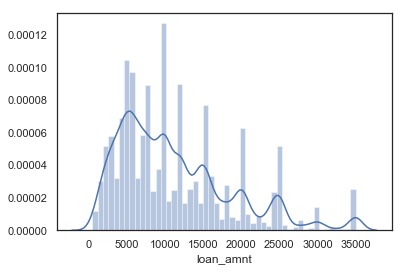

In [320]:
sns.distplot(loan['loan_amnt'])

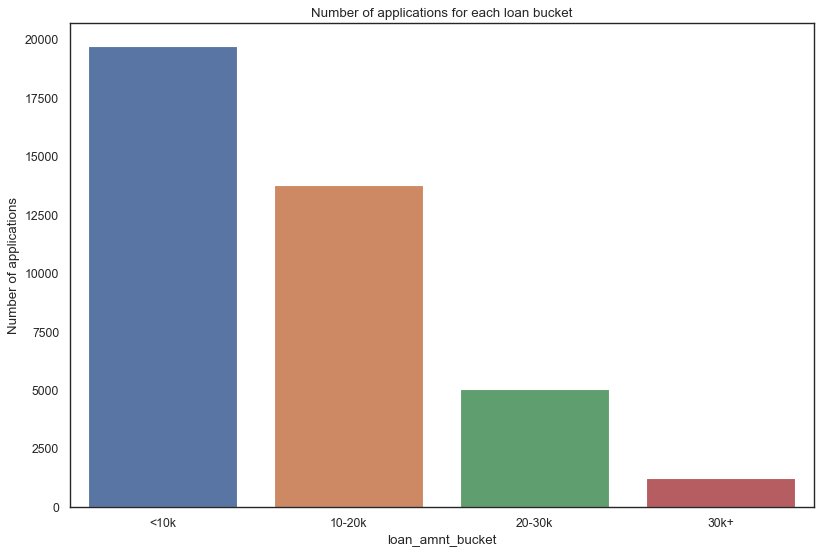

In [321]:
#Plotting Number of applications for each loan bucket
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt_bucket', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each loan bucket")
plt.ylabel("Number of applications")
plt.show()


In [322]:
loan_amnt_group = loan.groupby('loan_amnt_bucket')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

loan_amnt_bucket
<10k      49.588337
10-20k    34.705542
20-30k    12.672156
30k+       3.033965
Name: member_id, dtype: float64

From the above description it is evident that most of the application came for loan amount less than 20k. However, ~50% of the application constitutes loan amount less than 10k

In [323]:
loan['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

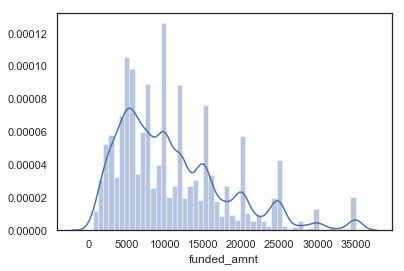

In [324]:
sns.distplot(loan['funded_amnt'])

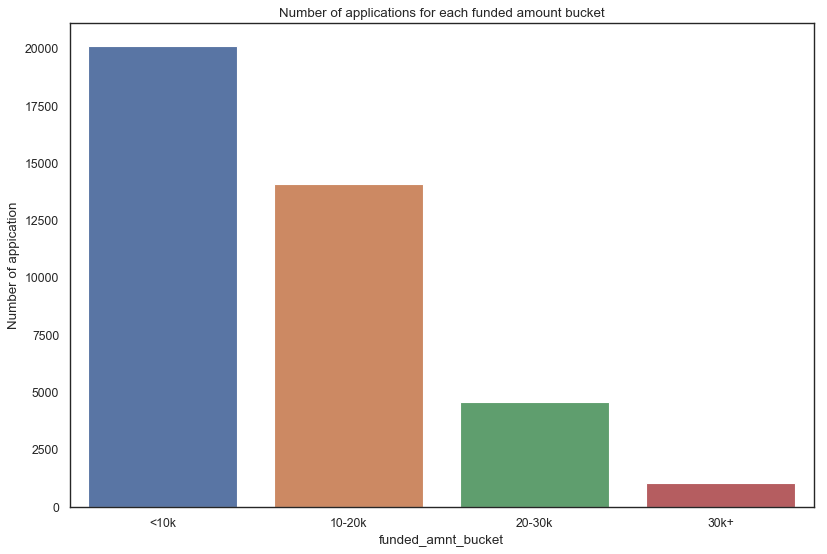

In [325]:
#Plotting Number of applications for each funded amount bucket
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='funded_amnt_bucket', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each funded amount bucket")
plt.ylabel("Number of appication")
plt.show()

In [326]:
loan_amnt_group = loan.groupby('funded_amnt_bucket')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

funded_amnt_bucket
<10k      50.535035
10-20k    35.400458
20-30k    11.501372
30k+       2.563134
Name: member_id, dtype: float64

In [327]:
loan['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

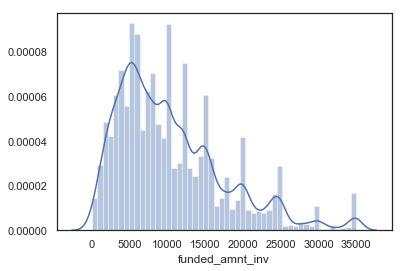

In [328]:
sns.distplot(loan['funded_amnt_inv'])

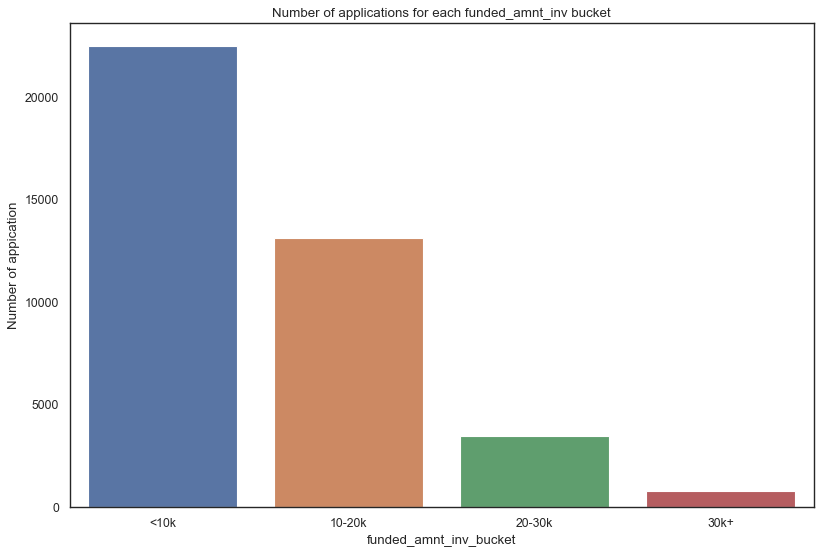

In [329]:
#Plotting Number of applications for each funded_amnt_inv bucket
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='funded_amnt_inv_bucket', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each funded_amnt_inv bucket")
plt.ylabel("Number of appication")
plt.show()

In [330]:
loan_amnt_group = loan.groupby('funded_amnt_inv_bucket')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

funded_amnt_inv_bucket
<10k      56.509807
10-20k    32.985875
20-30k     8.623511
30k+       1.880807
Name: member_id, dtype: float64

In [331]:
#Finding the correlation between three columns loan_amnt, funded_amnt and funded_amnt_inv
loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981578,0.940034
funded_amnt,0.981578,1.000000,0.958422
funded_amnt_inv,0.940034,0.958422,1.000000


since the distribution of loan_amnt, funded_amnt, funded_amnt_inv is similar and thses three columns are highly correlated , hence for further analysis only taking loan_amnt. Also loan_amnt is the variable which will be definitely available at the time of application

In [332]:
loan.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1, inplace=True)

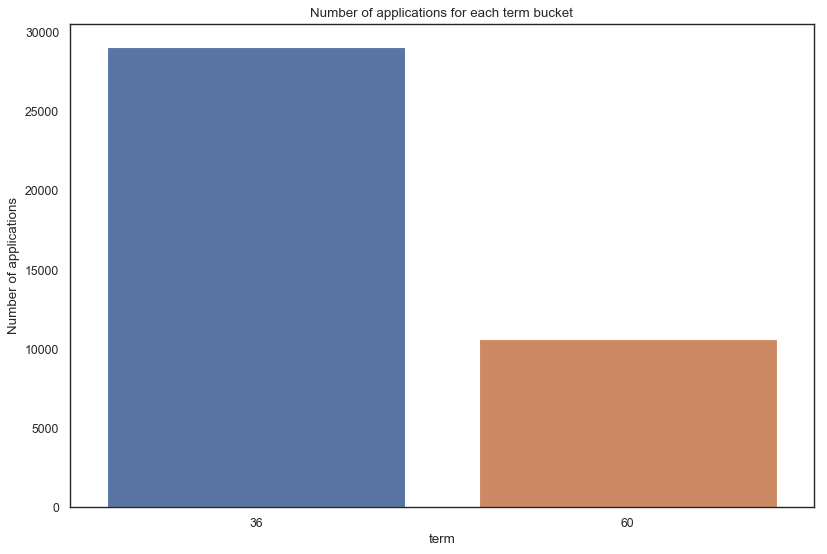

In [333]:
#Plotting Number of applications for each term bucket
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='term', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each term bucket")
plt.ylabel("Number of applications")
plt.show()

In [334]:
loan_amnt_group = loan.groupby('term')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

term
36    73.258302
60    26.741698
Name: member_id, dtype: float64

Most of the loan application are approved for the term of 36 months and it constitutes 75% of the application.

In [335]:
loan['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

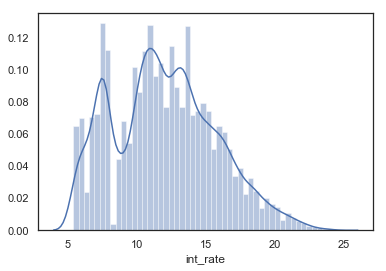

In [336]:
sns.distplot(loan['int_rate'])

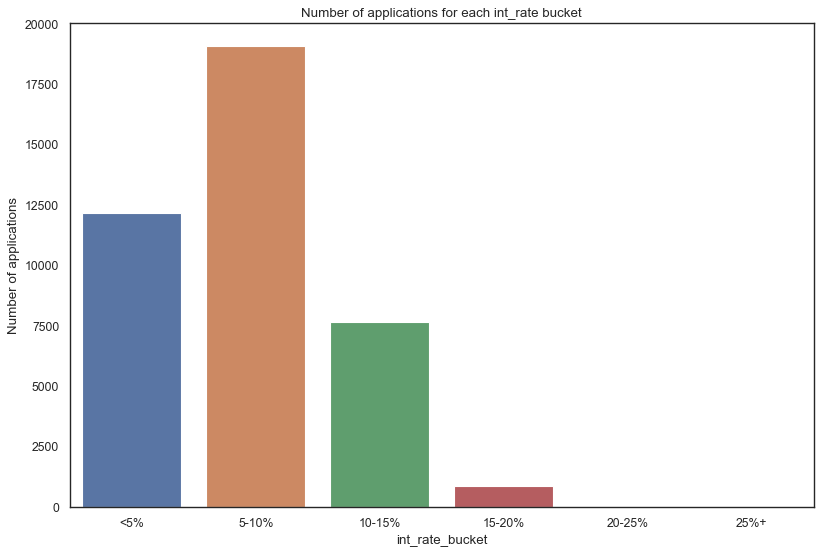

In [337]:
#Plotting Number of applications for each int_rate bucket
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='int_rate_bucket', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each int_rate bucket")
plt.ylabel("Number of applications")
plt.show()

In [338]:
loan_amnt_group = loan.groupby('int_rate_bucket')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

int_rate_bucket
<5%       30.571292
5-10%     47.951759
10-15%    19.281416
15-20%     2.195533
20-25%     0.000000
25%+       0.000000
Name: member_id, dtype: float64

From the above analysis it is clear that most of the application are charged interest rate < 15% with the highest number of application lying between 5% and 10% which constitutes about 47% of the total applications

In [339]:
loan['grade'].describe()

count     39717
unique        7
top           B
freq      12020
Name: grade, dtype: object

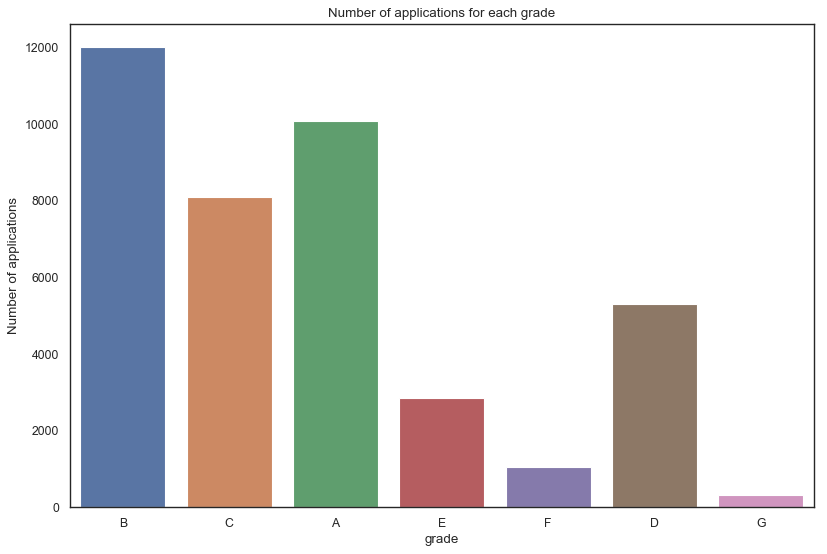

In [340]:
#Plotting Number of applications for each grade
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='grade', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each grade")
plt.ylabel("Number of applications")
plt.show()

In [341]:
loan_amnt_group = loan.groupby('grade')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

grade
A    25.392149
B    30.264119
C    20.389254
D    13.362036
E     7.155626
F     2.641186
G     0.795629
Name: member_id, dtype: float64

Most of loans are classified under grades A, B, C, D with ~30% of the loans lying in B grade

In [342]:
loan['sub_grade'].describe()

count     39717
unique       35
top          B3
freq       2917
Name: sub_grade, dtype: object

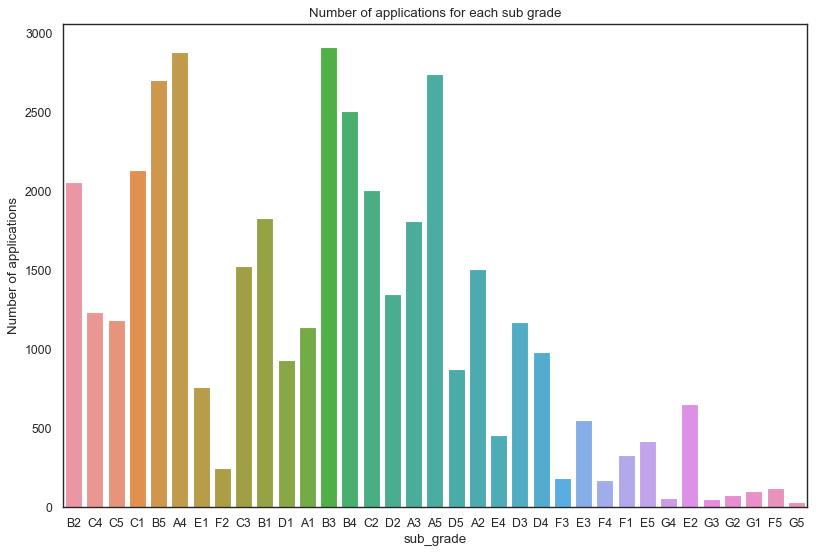

In [343]:
#Plotting Number of applications for each sub grade
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='sub_grade', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each sub grade")
plt.ylabel("Number of applications")
plt.show()

In [344]:
loan_amnt_group = loan.groupby('sub_grade')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

sub_grade
G5    0.075534
G3    0.120855
G4    0.140998
G2    0.196389
G1    0.261853
F5    0.297102
F4    0.422993
F3    0.465796
F2    0.626936
F1    0.828361
E5    1.047410
E4    1.143087
E3    1.392351
E2    1.651686
E1    1.921092
D5    2.200569
D1    2.344084
D4    2.469975
A1    2.867790
D3    2.953395
C5    2.986127
C4    3.112018
D2    3.394013
A2    3.796863
C3    3.849737
A3    4.557242
B1    4.607599
C2    5.063323
B2    5.179142
C1    5.378050
B4    6.324748
B5    6.808168
A5    6.903845
A4    7.266410
B3    7.344462
Name: member_id, dtype: float64

Most of the loans are under sub grade A4, A5, B3, B4 and B5 with ~7.4% of the loans falling under B3 sub grade

In [345]:
loan['emp_length'].describe()

count     38642
unique       11
top         10+
freq       8879
Name: emp_length, dtype: object

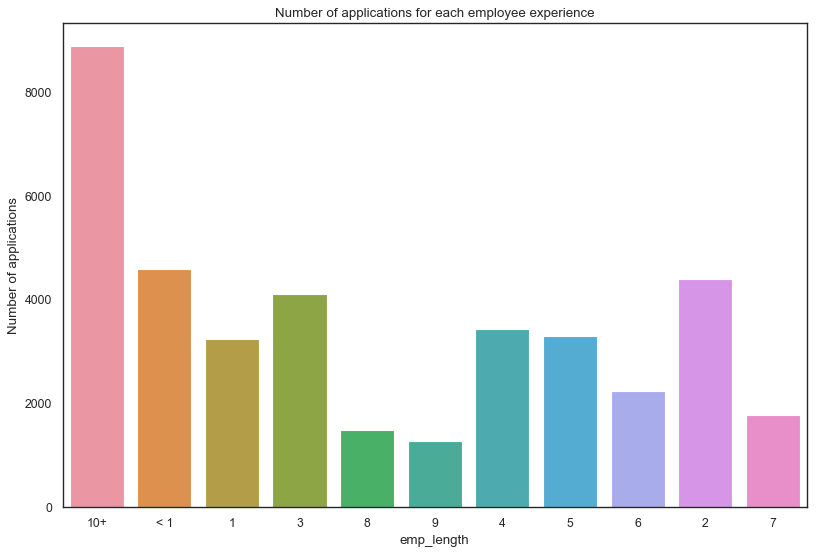

In [346]:
#Plotting Number of applications for each employee experience
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='emp_length', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each employee experience")
plt.ylabel("Number of applications")
plt.show()

In [347]:
loan_amnt_group = loan.groupby('emp_length')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values(ascending = False)

emp_length
10+    22.355666
< 1    11.539139
2      11.048166
3      10.310446
4       8.651207
5       8.263464
1       8.157716
6       5.612206
7       4.464083
8       3.723846
9       3.167409
Name: member_id, dtype: float64

From the above plot and analysis we can conclude that most of the applicants are having experience > 10 years which is around 22% of the total application.

In [348]:
loan['home_ownership'].describe()

count     39717
unique        5
top        RENT
freq      18899
Name: home_ownership, dtype: object

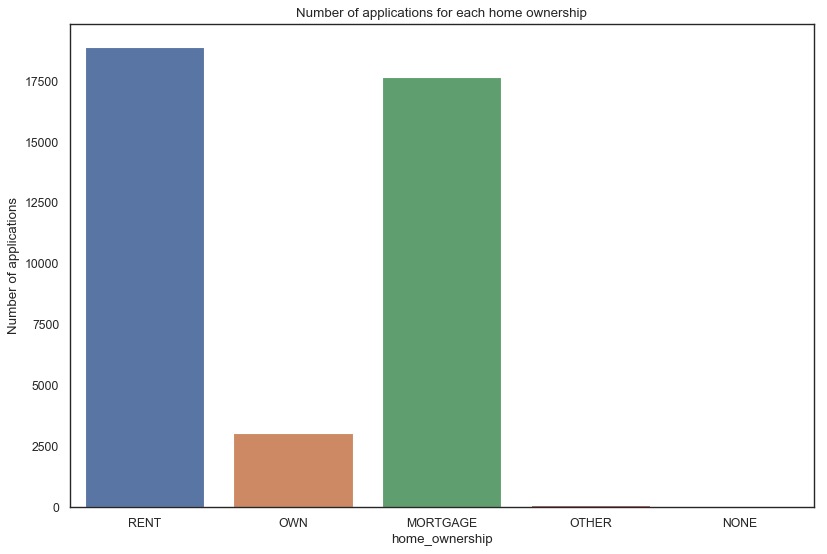

In [349]:
#Plotting Number of applications for each home ownership
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='home_ownership', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each home ownership")
plt.ylabel("Number of applications")
plt.show()

In [350]:
loan_amnt_group = loan.groupby('home_ownership')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

home_ownership
NONE         0.007553
OTHER        0.246746
OWN          7.699474
MORTGAGE    44.462069
RENT        47.584158
Name: member_id, dtype: float64

Most of the applicants have either Mortagaged their home or live in rented home with the highest number of applicants living in rented home which is around 47%

In [351]:
loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

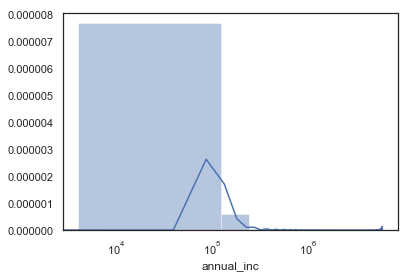

In [352]:
sns.distplot(loan['annual_inc'])
plt.xscale('log')

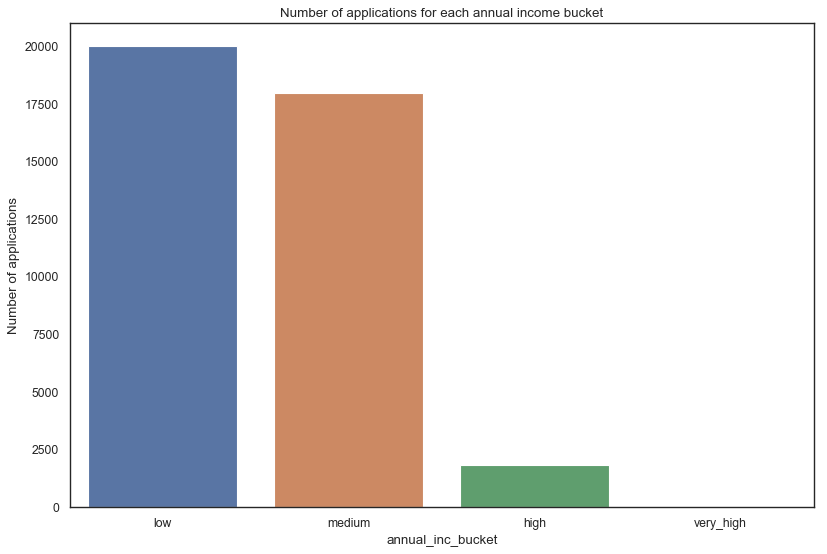

In [353]:
#Plotting Number of applications for each annual income bucket
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='annual_inc_bucket', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each annual income bucket")
plt.ylabel("Number of applications")
plt.show()

In [354]:
loan_amnt_group = loan.groupby('annual_inc_bucket')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

annual_inc_bucket
very_high     0.005036
high          4.504368
medium       45.184682
low          50.305914
Name: member_id, dtype: float64

Most of the people fall under low annual income bucket which constitutes around 50% of the applicants. Low bucket is the one which have income between 0 and 60000

In [355]:
loan['verification_status'].describe()

count            39717
unique               3
top       Not Verified
freq             16921
Name: verification_status, dtype: object

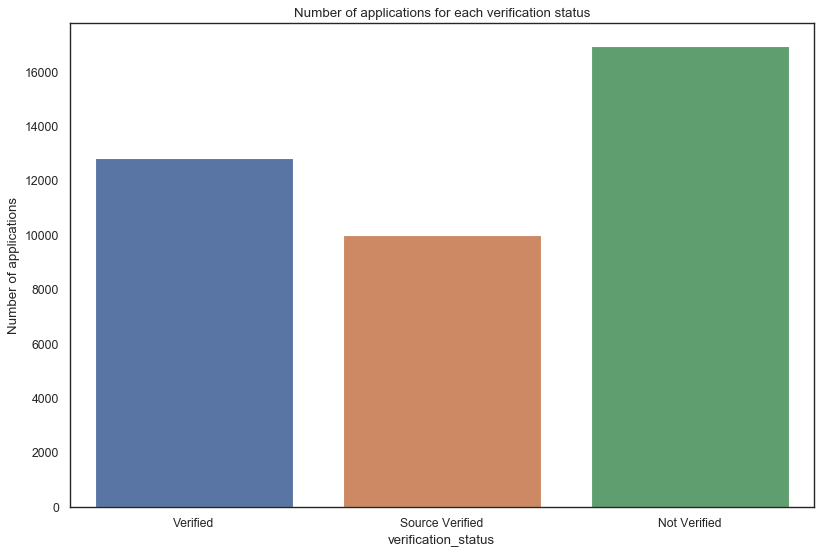

In [356]:
#Plotting Number of applications for each verification status
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='verification_status', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each verification status")
plt.ylabel("Number of applications")
plt.show()

In [357]:
loan_amnt_group = loan.groupby('verification_status')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

verification_status
Source Verified    25.145404
Verified           32.250674
Not Verified       42.603923
Name: member_id, dtype: float64

Most of the applicants' income source was not verified by the LC and it is around 43% of the total applicants

In [358]:
loan['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

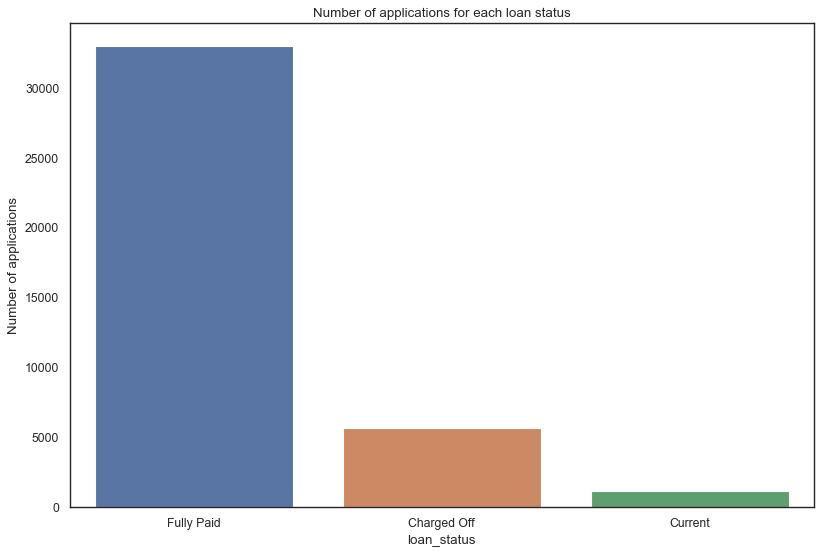

In [359]:
#Plotting Number of applications for each loan status
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_status', y='member_id', data=loan, estimator=len)
plt.title("Number of applications for each loan status")
plt.ylabel("Number of applications")
plt.show()

In [360]:
loan_amnt_group = loan.groupby('loan_status')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

loan_status
Current         2.870307
Charged Off    14.167737
Fully Paid     82.961956
Name: member_id, dtype: float64

It is interesting to note that ~82% of the loans were fully paid and ony ~14% of the loans were charged off

In [361]:
loan['purpose'].describe()

count                  39717
unique                    14
top       debt_consolidation
freq                   18641
Name: purpose, dtype: object

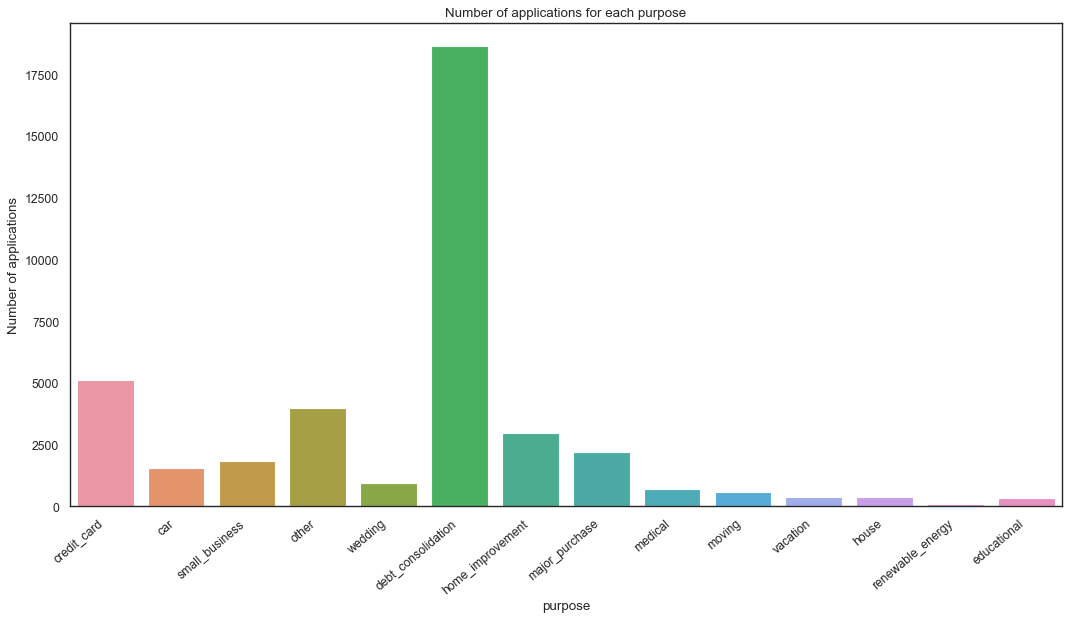

In [362]:
#Plotting Number of applications for each purpose
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='purpose', y='member_id', data=loan, estimator=len)
bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each purpose")
plt.ylabel("Number of applications")
plt.show()

In [363]:
loan_amnt_group = loan.groupby('purpose')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values(ascending = False)

purpose
debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: member_id, dtype: float64

Most of the applications were filed with  purpose of debt_consolidation, credit_card, other and home_improvement. However debt_consolidation consitutes around 47% of the applications

In [364]:
loan['zip_code'].describe()

count     39717
unique      823
top       100xx
freq        597
Name: zip_code, dtype: object

In [365]:
loan_amnt_group = loan.groupby('zip_code')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

zip_code
007xx    0.002518
408xx    0.002518
397xx    0.002518
396xx    0.002518
388xx    0.002518
386xx    0.002518
385xx    0.002518
384xx    0.002518
383xx    0.002518
381xx    0.002518
378xx    0.002518
375xx    0.002518
373xx    0.002518
372xx    0.002518
369xx    0.002518
353xx    0.002518
332xx    0.002518
289xx    0.002518
266xx    0.002518
252xx    0.002518
248xx    0.002518
169xx    0.002518
162xx    0.002518
096xx    0.002518
414xx    0.002518
093xx    0.002518
463xx    0.002518
469xx    0.002518
965xx    0.002518
884xx    0.002518
           ...   
303xx    0.553919
951xx    0.561472
980xx    0.563990
920xx    0.574061
201xx    0.576579
334xx    0.589168
902xx    0.591686
925xx    0.596722
080xx    0.614347
330xx    0.642042
891xx    0.642042
913xx    0.699952
852xx    0.702470
113xx    0.715059
117xx    0.762897
770xx    0.808218
921xx    0.871163
917xx    0.876199
331xx    0.878717
941xx    0.896342
750xx    0.924038
926xx    0.934109
300xx    0.992019
021xx    0.999572
9

Here the zipcodes are also distributed within a close range of occurence having maximum of 1.5% and none of the zipcode is major, hence dropping this column for the future analysis.

In [366]:
loan.drop('zip_code', axis = 1, inplace= True)

In [367]:
loan['addr_state'].describe()

count     39717
unique       50
top          CA
freq       7099
Name: addr_state, dtype: object

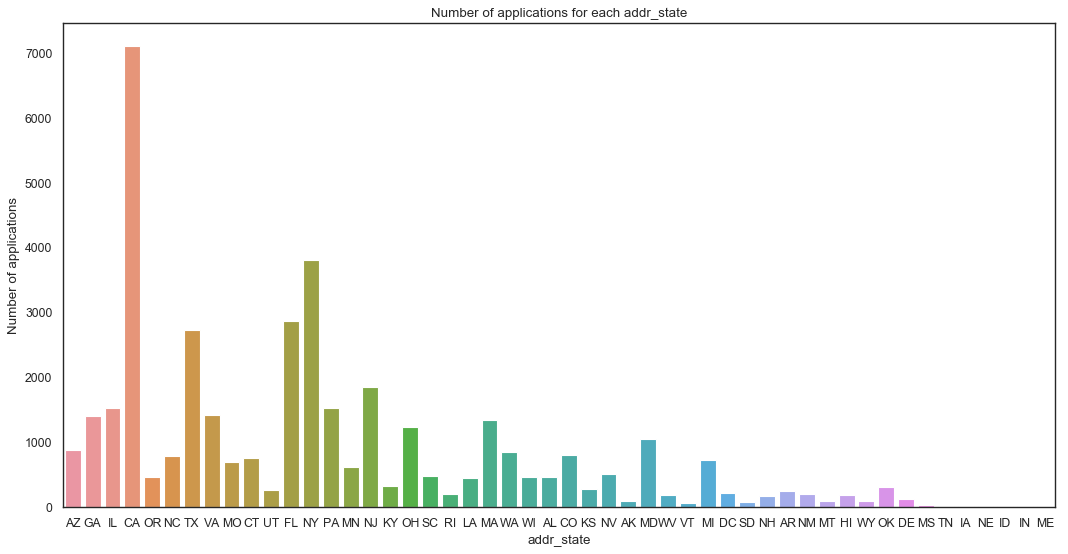

In [368]:
#Plotting Number of applications for each addr_state
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='addr_state', y='member_id', data=loan, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each addr_state")
plt.ylabel("Number of applications")
plt.show()

In [369]:
loan_amnt_group = loan.groupby('addr_state')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

addr_state
ME     0.007553
NE     0.012589
IA     0.012589
ID     0.015107
IN     0.022660
TN     0.042803
MS     0.047838
VT     0.135962
SD     0.161140
AK     0.201425
WY     0.208979
MT     0.214014
DE     0.287031
NH     0.430546
HI     0.438100
WV     0.445653
NM     0.475867
RI     0.498527
DC     0.538812
AR     0.616864
UT     0.649596
KS     0.682327
OK     0.752826
KY     0.818289
LA     1.097767
OR     1.135534
AL     1.138052
WI     1.158194
SC     1.188408
NV     1.251353
MN     1.548455
MO     1.727220
MI     1.812826
CT     1.890878
NC     1.984037
CO     1.994108
WA     2.114963
AZ     2.213158
MD     2.641186
OH     3.079286
MA     3.373870
GA     3.519903
VA     3.542564
PA     3.819523
IL     3.839666
NJ     4.657955
TX     6.866077
FL     7.216054
NY     9.597905
CA    17.873958
Name: member_id, dtype: float64

Highest number of applicants are from CA(California), NY(NewYork), FL(Florida) and TX(Texas) with California topping the chart

In [370]:
loan['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

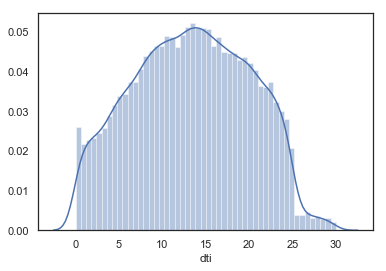

In [371]:
sns.distplot(loan['dti'])

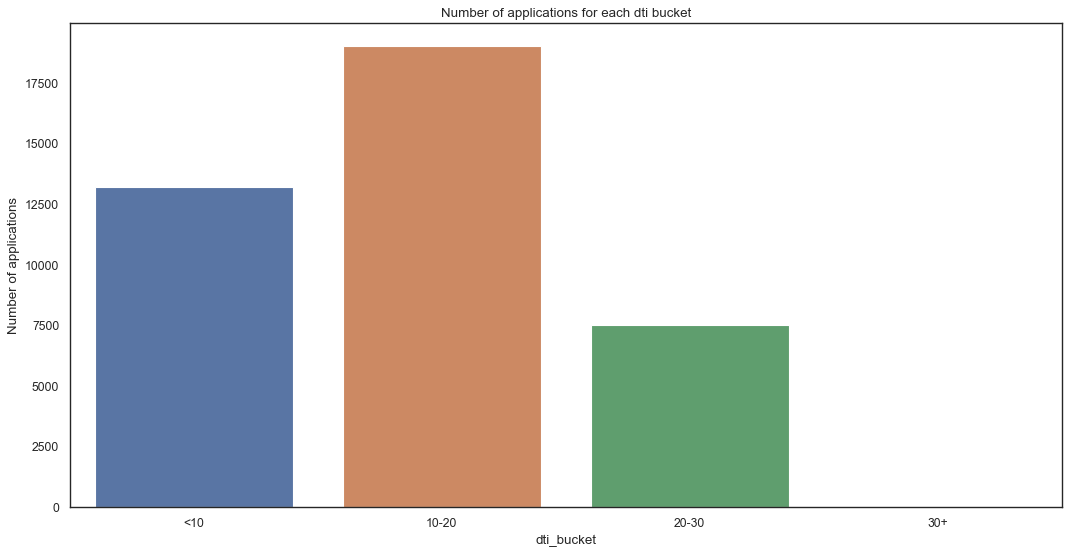

In [372]:
#Plotting Number of applications for each dti bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='dti_bucket', y='member_id', data=loan, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each dti bucket")
plt.ylabel("Number of applications")
plt.show()

In [373]:
loan_amnt_group = loan.groupby('dti_bucket')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index))

dti_bucket
<10      33.240174
10-20    47.840975
20-30    18.918851
30+       0.000000
Name: member_id, dtype: float64

47% of the applicants are having dti between 10% to 20%

In [374]:
loan['issue_d_month'].describe()

count     39717
unique       12
top         Dec
freq       4433
Name: issue_d_month, dtype: object

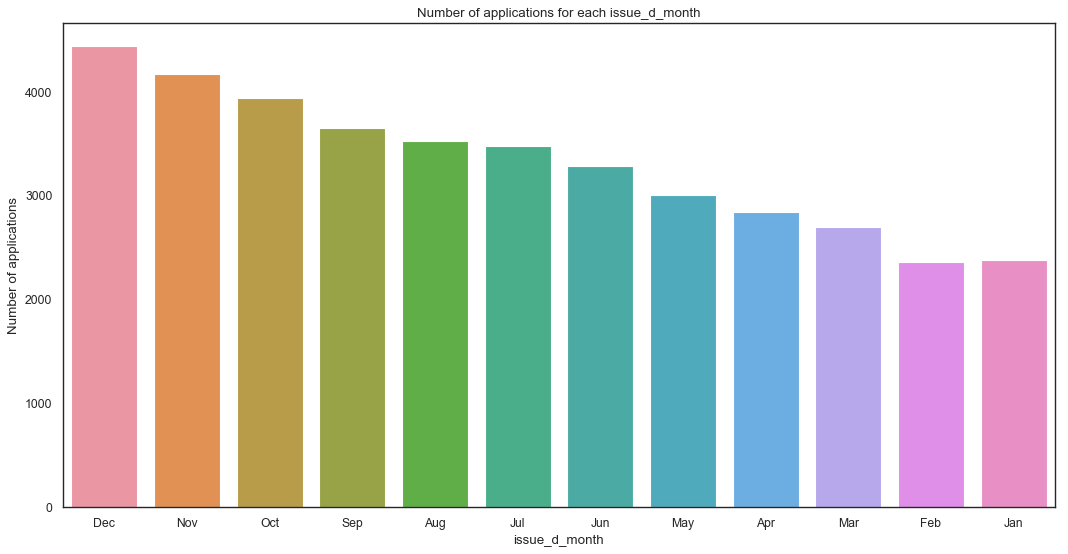

In [375]:
#Plotting Number of applications for each issue_d_month
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='issue_d_month', y='member_id', data=loan, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each issue_d_month")
plt.ylabel("Number of applications")
plt.show()

In [376]:
loan_amnt_group = loan.groupby('issue_d_month')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

issue_d_month
Feb     5.937004
Jan     5.989878
Mar     6.777954
Apr     7.135484
May     7.550923
Jun     8.255911
Jul     8.751920
Aug     8.857668
Sep     9.184984
Oct     9.905078
Nov    10.491729
Dec    11.161467
Name: member_id, dtype: float64

Most of the applications are filed in the month of November and December. The number of applications are increasing from month of January to December.

In [377]:
loan['issue_d_year'].describe()

count     39717
unique        5
top          11
freq      21656
Name: issue_d_year, dtype: object

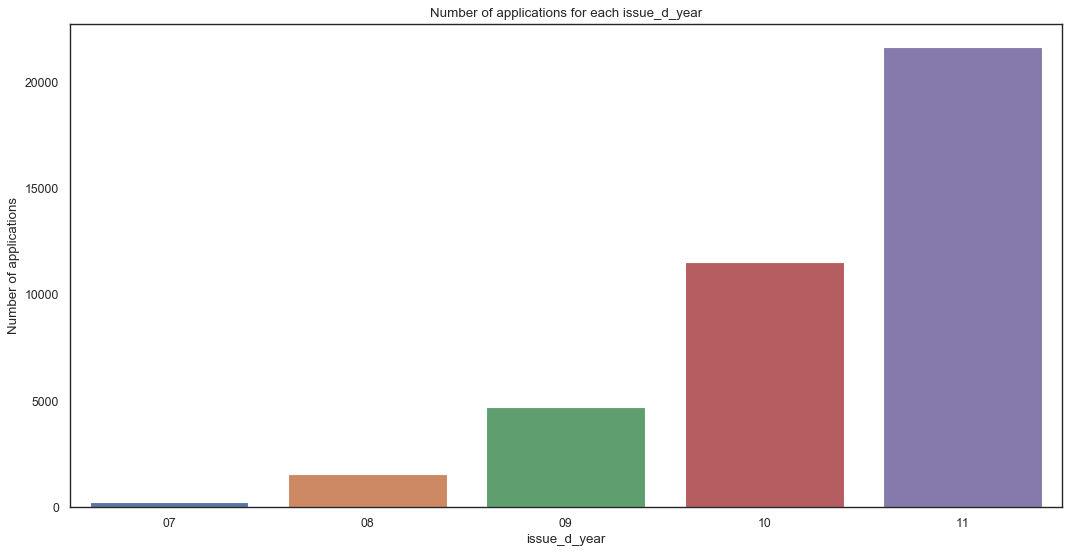

In [378]:
#Plotting Number of applications for each issue_d_year
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='issue_d_year', y='member_id', data=loan, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each issue_d_year")
plt.ylabel("Number of applications")
plt.show()

In [379]:
loan_amnt_group = loan.groupby('issue_d_year')['member_id'].count()
loan_amnt_group.apply(lambda x : 100*x/len(loan.index)).sort_values()

issue_d_year
07     0.631971
08     3.932825
09    11.874009
10    29.035426
11    54.525770
Name: member_id, dtype: float64

The number of applications have increased from 2007 to 2011

### Segmented Univariate Analysis

Here we will remove the loan_staus current because it will not help in analysis. These are the ones for which we don't have any end result

In [380]:
loan = loan[loan.loan_status != 'Current']

In [381]:
#Creating different dataset for CHarged Off and Fully Paid
charged_off = loan[loan.loan_status == "Charged Off"]
fully_paid = loan[loan.loan_status == "Fully Paid"]

Inspecting the charged_off and fully_paid dataset

In [382]:
charged_off.shape

(5627, 23)

In [383]:
fully_paid.shape

(32950, 23)

In [384]:
charged_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 23 columns):
member_id                 5627 non-null int64
loan_amnt                 5627 non-null int64
term                      5627 non-null int64
int_rate                  5627 non-null float64
grade                     5627 non-null object
sub_grade                 5627 non-null object
emp_length                5399 non-null object
home_ownership            5627 non-null object
annual_inc                5627 non-null float64
verification_status       5627 non-null object
issue_d                   5627 non-null object
loan_status               5627 non-null object
purpose                   5627 non-null object
addr_state                5627 non-null object
dti                       5627 non-null float64
issue_d_month             5627 non-null object
issue_d_year              5627 non-null object
loan_amnt_bucket          5627 non-null category
funded_amnt_bucket        5627 non-null cate

In [385]:
fully_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 39716
Data columns (total 23 columns):
member_id                 32950 non-null int64
loan_amnt                 32950 non-null int64
term                      32950 non-null int64
int_rate                  32950 non-null float64
grade                     32950 non-null object
sub_grade                 32950 non-null object
emp_length                32145 non-null object
home_ownership            32950 non-null object
annual_inc                32950 non-null float64
verification_status       32950 non-null object
issue_d                   32950 non-null object
loan_status               32950 non-null object
purpose                   32950 non-null object
addr_state                32950 non-null object
dti                       32950 non-null float64
issue_d_month             32950 non-null object
issue_d_year              32950 non-null object
loan_amnt_bucket          32950 non-null category
funded_amnt_bucket       

In [386]:
charged_off.describe(include='all')

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
count,5.627000e+03,5627.000000,5627.000000,5627.000000,5627,5627,5399,5627,5.627000e+03,5627,...,5627,5627.000000,5627,5627,5627,5627,5627,5627,5627,5627
unique,NaN,NaN,NaN,NaN,7,35,11,4,NaN,3,...,47,NaN,12,5,4,4,4,4,3,3
top,NaN,NaN,NaN,NaN,B,B5,10+,RENT,NaN,Not Verified,...,CA,NaN,Dec,11,<10k,<10k,<10k,5-10%,low,10-20
freq,NaN,NaN,NaN,NaN,1425,356,1331,2839,NaN,2142,...,1125,NaN,678,3256,2594,2647,3046,2738,3224,2793
mean,8.677521e+05,12104.385108,46.236360,13.820432,NaN,NaN,NaN,NaN,6.242730e+04,NaN,...,NaN,14.000624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.723270e+05,8085.732038,11.870746,3.654413,NaN,NaN,NaN,NaN,4.777601e+04,NaN,...,NaN,6.585577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.035300e+04,900.000000,36.000000,5.420000,NaN,NaN,NaN,NaN,4.080000e+03,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.849050e+05,5600.000000,36.000000,11.310000,NaN,NaN,NaN,NaN,3.700000e+04,NaN,...,NaN,9.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.881580e+05,10000.000000,36.000000,13.610000,NaN,NaN,NaN,NaN,5.300000e+04,NaN,...,NaN,14.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.066578e+06,16500.000000,60.000000,16.400000,NaN,NaN,NaN,NaN,7.500000e+04,NaN,...,NaN,19.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
fully_paid.describe(include='all')

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
count,3.295000e+04,32950.000000,32950.000000,32950.000000,32950,32950,32145,32950,3.295000e+04,32950,...,32950,32950.000000,32950,32950,32950,32950,32950,32950,32950,32950
unique,NaN,NaN,NaN,NaN,7,35,11,5,NaN,3,...,50,NaN,12,5,4,4,4,4,4,3
top,NaN,NaN,NaN,NaN,B,A4,10+,RENT,NaN,Not Verified,...,CA,NaN,Dec,11,<10k,<10k,<10k,5-10%,low,10-20
freq,NaN,NaN,NaN,NaN,10250,2695,7157,15641,NaN,14552,...,5824,NaN,3537,17260,16871,17186,19148,15776,16271,15655
mean,8.379351e+05,10866.455994,41.157633,11.609761,NaN,NaN,NaN,NaN,6.986250e+04,NaN,...,NaN,13.148421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.628412e+05,7199.629493,9.858243,3.599964,NaN,NaN,NaN,NaN,6.656225e+04,NaN,...,NaN,6.680041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.069900e+04,500.000000,36.000000,5.420000,NaN,NaN,NaN,NaN,4.000000e+03,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.556990e+05,5200.000000,36.000000,8.490000,NaN,NaN,NaN,NaN,4.113275e+04,NaN,...,NaN,7.980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.326645e+05,9600.000000,36.000000,11.490000,NaN,NaN,NaN,NaN,6.000000e+04,NaN,...,NaN,13.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.031071e+06,15000.000000,36.000000,13.990000,NaN,NaN,NaN,NaN,8.400000e+04,NaN,...,NaN,18.390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
charged_off.head(10)

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
1,1314167,2500,60,15.27,C,C4,< 1,RENT,30000.0,Source Verified,...,GA,1.00,Dec,11,<10k,<10k,<10k,10-15%,low,<10
8,1306957,5600,60,21.28,F,F2,4,OWN,40000.0,Source Verified,...,CA,5.55,Dec,11,<10k,<10k,<10k,15-20%,low,<10
9,1306721,5375,60,12.69,B,B5,< 1,RENT,15000.0,Verified,...,TX,18.08,Dec,11,<10k,<10k,<10k,5-10%,low,10-20
12,1298717,9000,36,13.49,C,C1,< 1,RENT,30000.0,Source Verified,...,VA,10.08,Dec,11,<10k,<10k,<10k,5-10%,low,10-20
14,1303503,10000,36,10.65,B,B2,3,RENT,100000.0,Source Verified,...,CA,7.06,Dec,11,10-20k,10-20k,10-20k,5-10%,medium,<10
21,1269083,21000,36,12.42,B,B4,10+,RENT,105000.0,Verified,...,FL,13.22,Dec,11,20-30k,20-30k,20-30k,5-10%,medium,10-20
24,1304634,6000,36,11.71,B,B3,1,RENT,76000.0,Not Verified,...,CA,2.40,Dec,11,<10k,<10k,<10k,5-10%,medium,<10
26,1304679,15000,36,14.27,C,C2,9,RENT,60000.0,Not Verified,...,NY,15.22,Dec,11,10-20k,10-20k,<10k,5-10%,medium,10-20
27,1304764,5000,60,16.77,D,D2,2,RENT,50004.0,Not Verified,...,PA,13.97,Dec,11,<10k,<10k,<10k,10-15%,low,10-20
46,1304521,5000,36,8.90,A,A5,10+,MORTGAGE,100000.0,Source Verified,...,OH,16.33,Dec,11,<10k,<10k,<10k,<5%,medium,10-20


In [389]:
fully_paid.head(10)

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bucket,funded_amnt_bucket,funded_amnt_inv_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,1296599,5000,36,10.65,B,B2,10+,RENT,24000.0,Verified,...,AZ,27.65,Dec,11,<10k,<10k,<10k,5-10%,low,20-30
2,1313524,2400,36,15.96,C,C5,10+,RENT,12252.0,Not Verified,...,IL,8.72,Dec,11,<10k,<10k,<10k,10-15%,low,<10
3,1277178,10000,36,13.49,C,C1,10+,RENT,49200.0,Source Verified,...,CA,20.00,Dec,11,10-20k,10-20k,10-20k,5-10%,low,20-30
5,1311441,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,...,AZ,11.20,Dec,11,<10k,<10k,<10k,<5%,low,10-20
6,1304742,7000,60,15.96,C,C5,8,RENT,47004.0,Not Verified,...,NC,23.51,Dec,11,<10k,<10k,<10k,10-15%,low,20-30
7,1288686,3000,36,18.64,E,E1,9,RENT,48000.0,Source Verified,...,CA,5.35,Dec,11,<10k,<10k,<10k,10-15%,low,<10
10,1305201,6500,60,14.65,C,C3,5,OWN,72000.0,Not Verified,...,AZ,16.12,Dec,11,<10k,<10k,<10k,5-10%,medium,10-20
11,1305008,12000,36,12.69,B,B5,10+,OWN,75000.0,Source Verified,...,CA,10.78,Dec,11,10-20k,10-20k,10-20k,5-10%,medium,10-20
13,1304956,3000,36,9.91,B,B1,3,RENT,15000.0,Source Verified,...,IL,12.56,Dec,11,<10k,<10k,<10k,<5%,low,10-20
15,1304871,1000,36,16.29,D,D1,< 1,RENT,28000.0,Not Verified,...,MO,20.31,Dec,11,<10k,<10k,<10k,10-15%,low,20-30


#### Since the charged_off dataset has less rows than fully_paid rows, every column will have higher percentage of values for each different value present in that column for fully_paid dataset as compared to charged_off dataset. Hence the data set is highly unbalanced for each loan_status. Hence for further analysis, the percentage cacluation for charged_off dataset is done on the basis of total rows present in it and the percentage cacluation for fully_paid dataset is done on the basis of total rows present in it. This will give the probability of the customer falling in a particular category in the column. The comparison is done for each value present in each column then for both the data sets

In [390]:
charged_off['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [391]:
fully_paid['loan_amnt'].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [392]:
c_group = charged_off.groupby('loan_amnt_bucket')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

loan_amnt_bucket
30k+       4.425093
20-30k    14.945797
10-20k    34.529945
<10k      46.099165
Name: member_id, dtype: float64

In [393]:
f_group = fully_paid.groupby('loan_amnt_bucket')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

loan_amnt_bucket
30k+       2.497724
20-30k    11.817906
10-20k    34.482549
<10k      51.201821
Name: member_id, dtype: float64

From the above analysis we can see that as the loan_amount is increasing from 10k to 30k there is shift from tendency of customer from fully paying the loan to defaulting. Customer requesting for loan amount greater than 20k has a higher likelihood of defaulting than paying the full loan

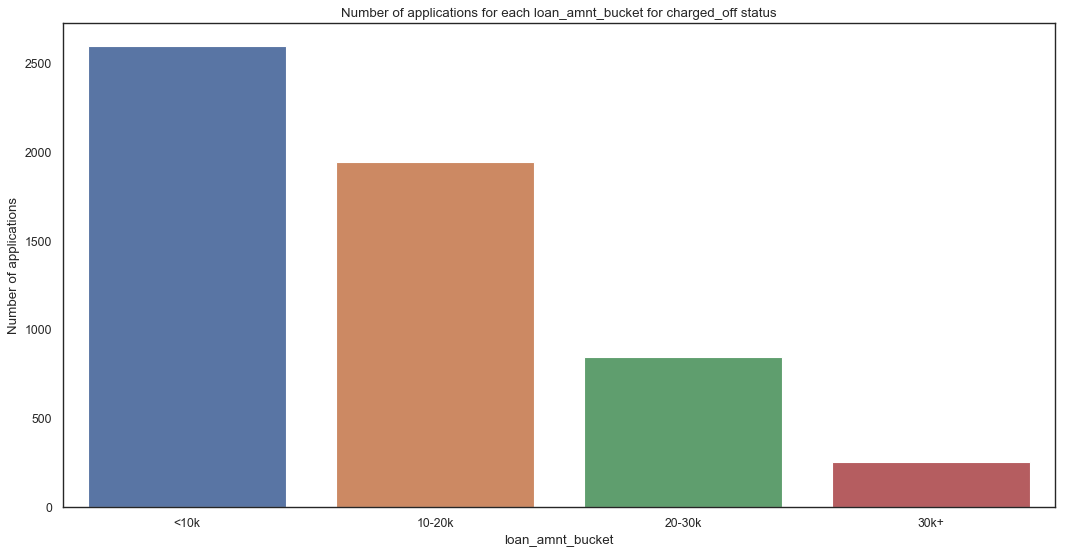

In [394]:
#Plotting Number of applications for each loan amount bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='loan_amnt_bucket', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each loan_amnt_bucket for charged_off status")
plt.ylabel("Number of applications")
plt.show()

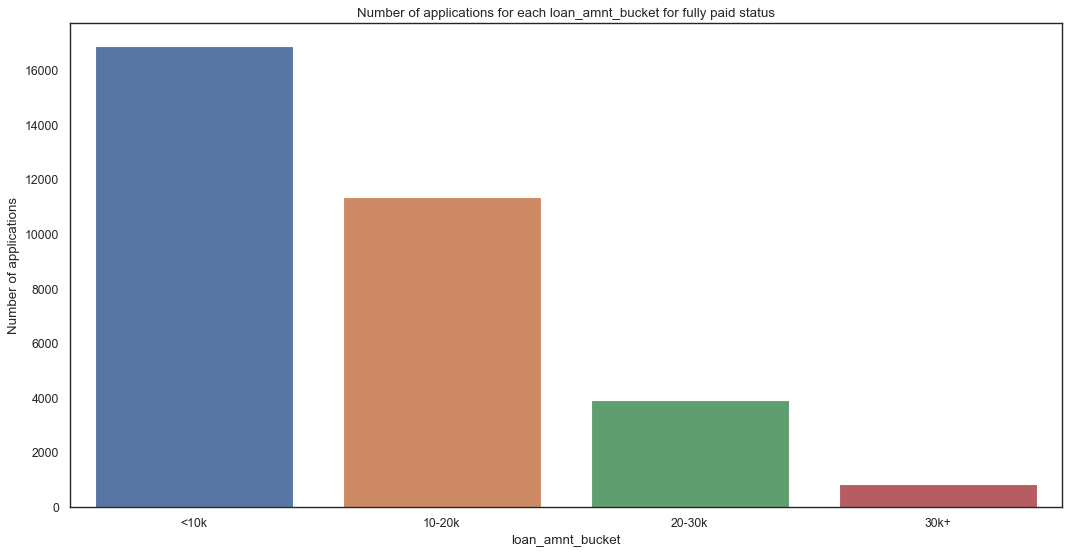

In [395]:
#Plotting Number of applications for each loan amount bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='loan_amnt_bucket', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each loan_amnt_bucket for fully paid status")
plt.ylabel("Number of applications")
plt.show()

In [396]:
c_group = charged_off.groupby('term')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

term
60    42.651502
36    57.348498
Name: member_id, dtype: float64

In [397]:
f_group = fully_paid.groupby('term')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

term
60    21.490137
36    78.509863
Name: member_id, dtype: float64

From the above analysis we can see that as the term is increasing from 36 months to 60 months there is shift from tendency of customer from fully paying the loan to defaulting. Customer having a term of 60 months has a higher likelihood of defaulting than paying the full loan

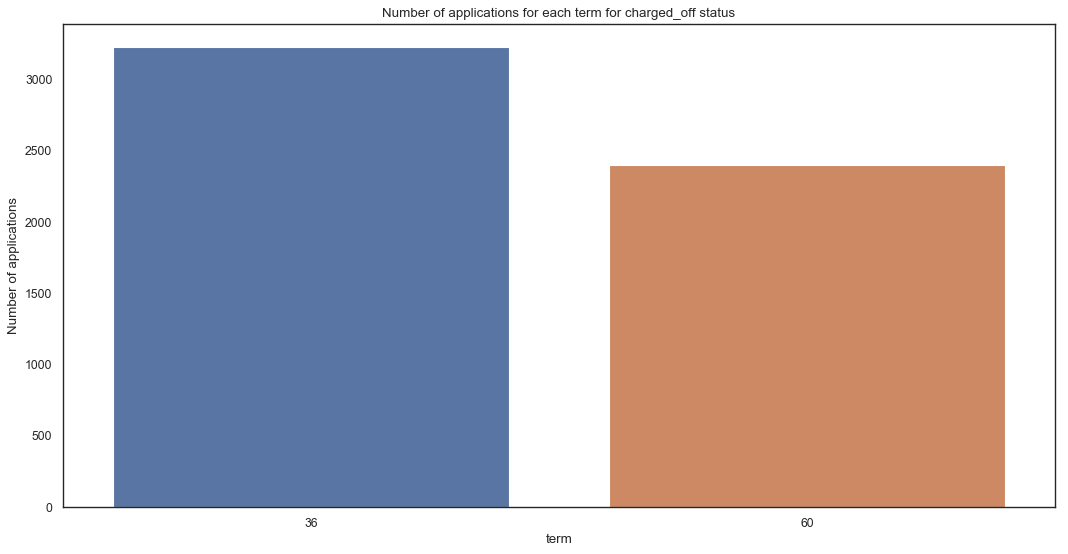

In [398]:
#Plotting Number of applications for each term
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='term', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each term for charged_off status")
plt.ylabel("Number of applications")
plt.show()

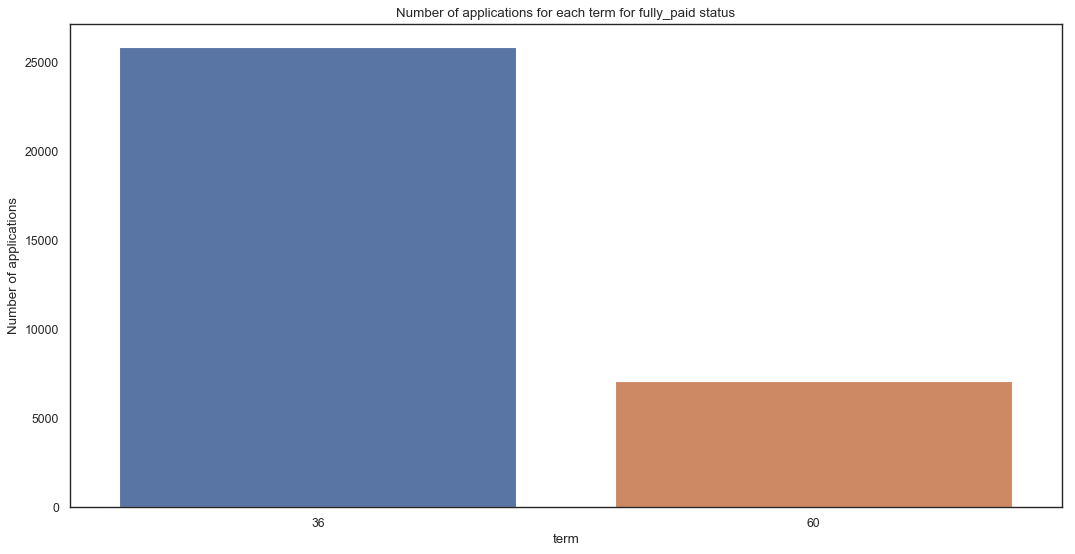

In [399]:
#Plotting Number of applications for each term
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='term', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each term for fully_paid status")
plt.ylabel("Number of applications")
plt.show()

In [400]:
charged_off['int_rate'].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

In [401]:
fully_paid['int_rate'].describe()

count    32950.000000
mean        11.609761
std          3.599964
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64

In [402]:
c_group = charged_off.groupby('int_rate_bucket')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index))

int_rate_bucket
<5%       14.199396
5-10%     48.658255
10-15%    31.881998
15-20%     5.260352
20-25%     0.000000
25%+       0.000000
Name: member_id, dtype: float64

In [403]:
f_group = fully_paid.groupby('int_rate_bucket')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index))

int_rate_bucket
<5%       34.197269
5-10%     47.878604
10-15%    16.485584
15-20%     1.438543
20-25%     0.000000
25%+       0.000000
Name: member_id, dtype: float64

From the above analysis we can see that as the interest rate is increasing from 5% to 20% there is shift from tendency of customer from fully paying the loan to defaulting. Customer having a interest rate between 10-20% has a higher likelihood of defaulting than paying the full loan

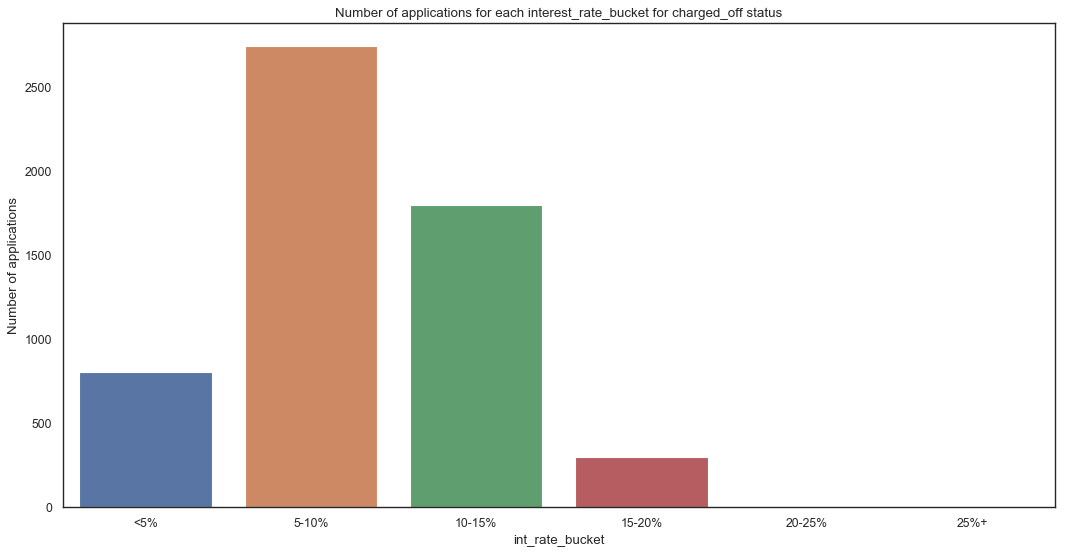

In [404]:
#Plotting Number of applications for each interest rate bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='int_rate_bucket', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each interest_rate_bucket for charged_off status")
plt.ylabel("Number of applications")
plt.show()

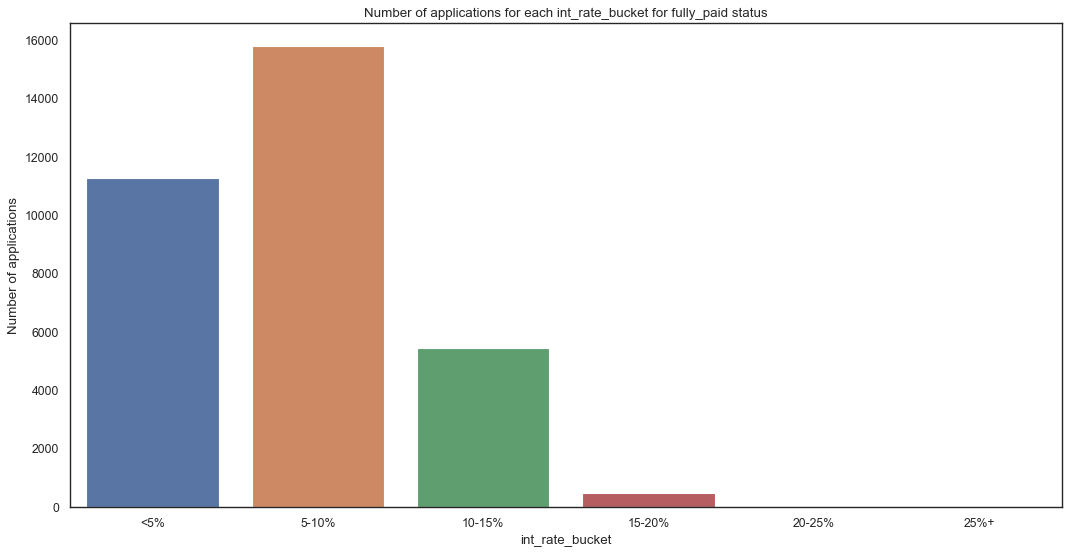

In [405]:
#Plotting Number of applications for each interest rate bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='int_rate_bucket', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each int_rate_bucket for fully_paid status")
plt.ylabel("Number of applications")
plt.show()

In [406]:
charged_off['grade'].describe()

count     5627
unique       7
top          B
freq      1425
Name: grade, dtype: object

In [407]:
fully_paid['grade'].describe()

count     32950
unique        7
top           B
freq      10250
Name: grade, dtype: object

In [408]:
c_group = charged_off.groupby('grade')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index))

grade
A    10.698418
B    25.324329
C    23.938155
D    19.868491
E    12.706593
F     5.669095
G     1.794917
Name: member_id, dtype: float64

In [409]:
f_group = fully_paid.groupby('grade')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index))

grade
A    28.658574
B    31.107739
C    19.687405
D    12.039454
E     5.911988
F     1.993930
G     0.600910
Name: member_id, dtype: float64

From the above analysis we can see that as the grade is reducing from A to G there is shift of tendency of customer from fully paying the loan to defaulting. Customer having grade lower than C including C has a higher likelihood of defaulting than paying the full loan

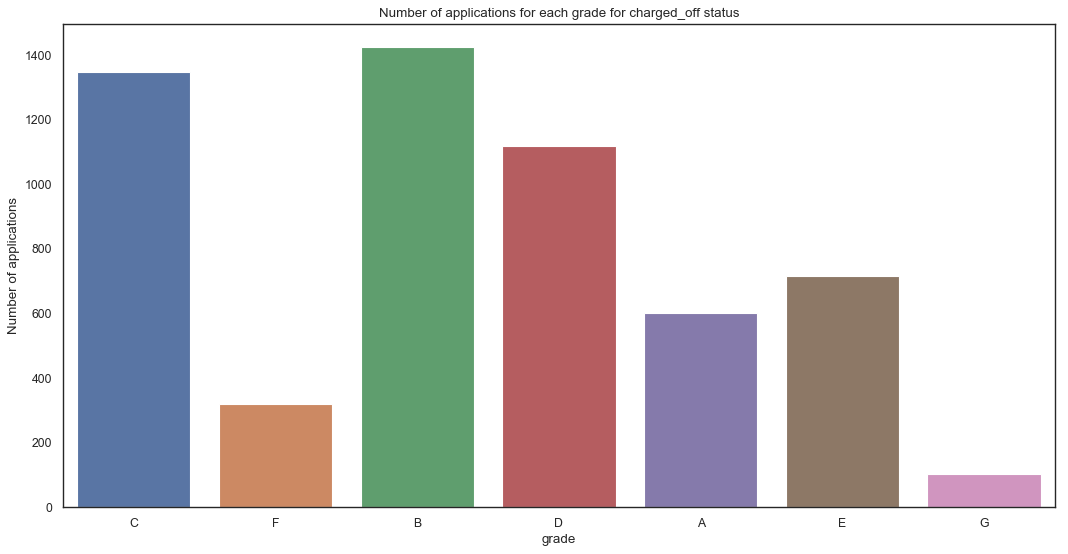

In [410]:
#Plotting Number of applications for each grade
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='grade', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each grade for charged_off status")
plt.ylabel("Number of applications")
plt.show()

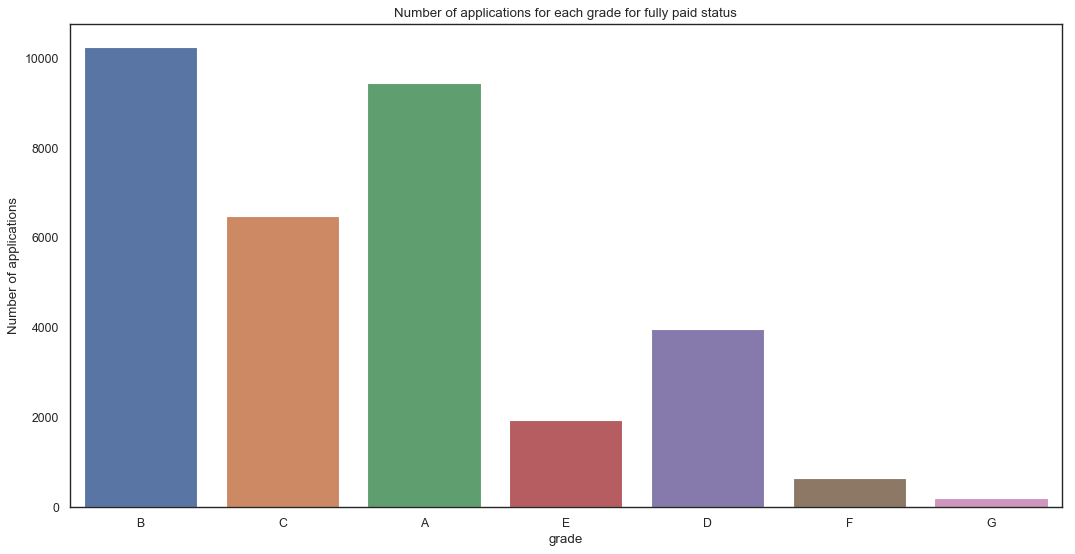

In [411]:
#Plotting Number of applications for each grade
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='grade', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each grade for fully paid status")
plt.ylabel("Number of applications")
plt.show()

In [412]:
charged_off['emp_length'].describe()

count     5399
unique      11
top        10+
freq      1331
Name: emp_length, dtype: object

In [413]:
fully_paid['emp_length'].describe()

count     32145
unique       11
top         10+
freq       7157
Name: emp_length, dtype: object

In [414]:
c_group = charged_off.groupby('emp_length')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index))

emp_length
1       8.103785
10+    23.653812
2      10.076417
3       9.863160
4       8.210414
5       8.139328
6       5.455838
7       4.673894
8       3.607606
9       2.807891
< 1    11.355962
Name: member_id, dtype: float64

In [415]:
f_group = fully_paid.groupby('emp_length')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index))

emp_length
1       8.233687
10+    21.720789
2      11.301973
3      10.491654
4       8.740516
5       8.303490
6       5.647951
7       4.394537
8       3.738998
9       3.241275
< 1    11.742033
Name: member_id, dtype: float64

From the above analysis we can see more experienced applicants that is those having experience > 10 years have a higher likelihood of defaulting than paying the full loan

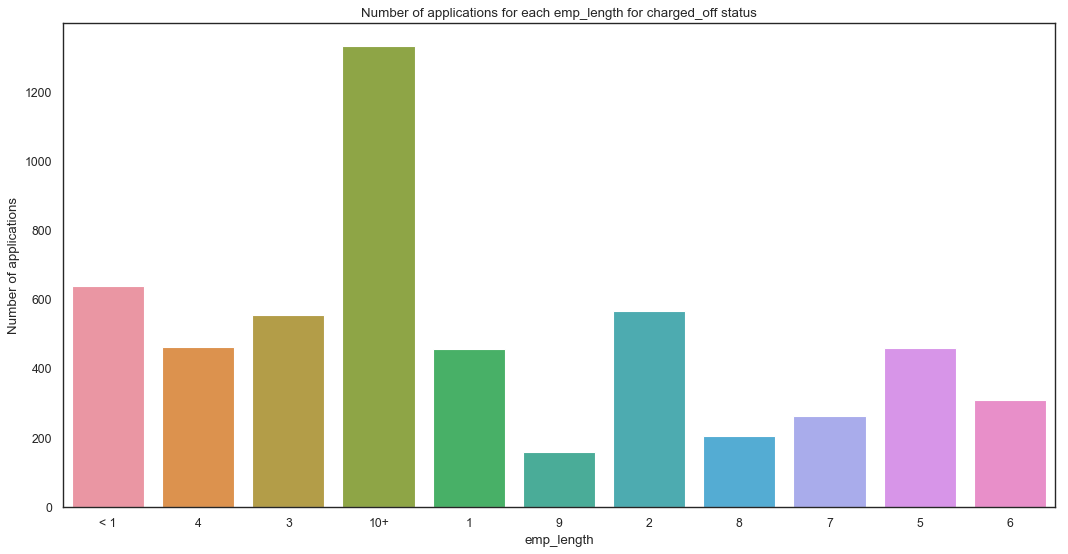

In [416]:
#Plotting Number of applications for emp length duration
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='emp_length', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each emp_length for charged_off status")
plt.ylabel("Number of applications")
plt.show()

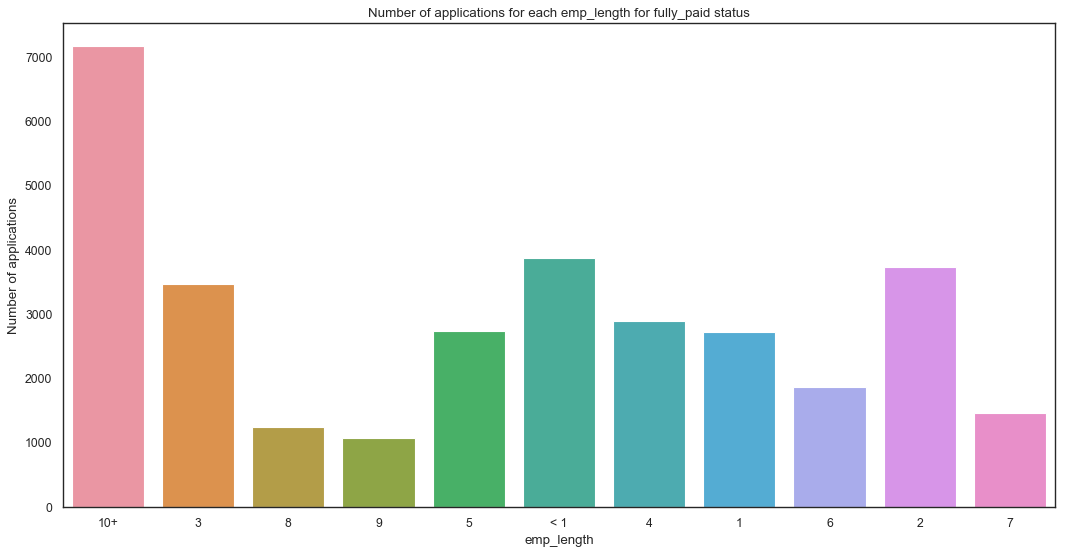

In [417]:
#Plotting Number of applications for each emp length duration
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='emp_length', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each emp_length for fully_paid status")
plt.ylabel("Number of applications")
plt.show()

In [418]:
charged_off['home_ownership'].describe()

count     5627
unique       4
top       RENT
freq      2839
Name: home_ownership, dtype: object

In [419]:
fully_paid['home_ownership'].describe()

count     32950
unique        5
top        RENT
freq      15641
Name: home_ownership, dtype: object

In [420]:
c_group = charged_off.groupby('home_ownership')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

home_ownership
OTHER        0.319886
OWN          7.872756
MORTGAGE    41.354185
RENT        50.453172
Name: member_id, dtype: float64

In [421]:
f_group = fully_paid.groupby('home_ownership')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

home_ownership
NONE         0.009105
OTHER        0.242792
OWN          7.684370
MORTGAGE    44.594841
RENT        47.468892
Name: member_id, dtype: float64

From the above analysis we can see that people staying in rented home has a higher likelihood of defaulting than paying the full loan

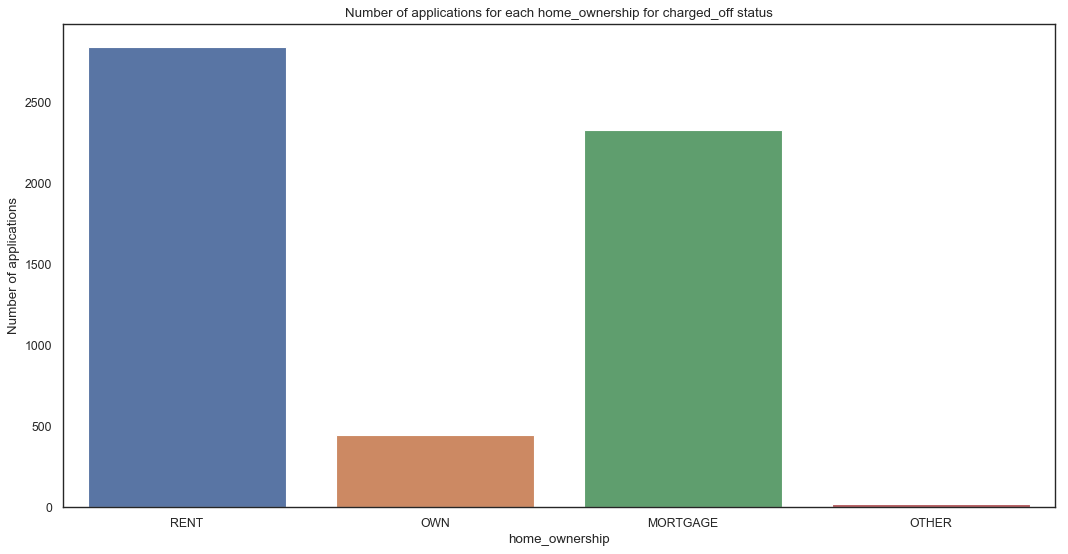

In [422]:
#Plotting Number of applications for each home ownership category
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='home_ownership', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each home_ownership for charged_off status")
plt.ylabel("Number of applications")
plt.show()

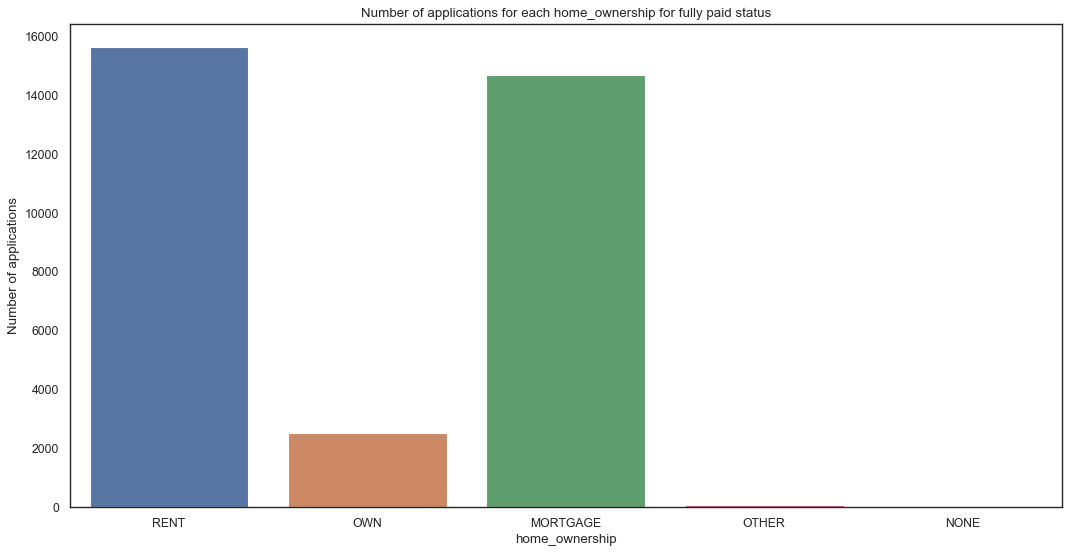

In [423]:
#Plotting Number of applications for each home ownership category
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='home_ownership', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each home_ownership for fully paid status")
plt.ylabel("Number of applications")
plt.show()

In [424]:
charged_off['annual_inc'].describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [425]:
fully_paid['annual_inc'].describe()

count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [426]:
c_group = charged_off.groupby('annual_inc_bucket')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

annual_inc_bucket
very_high     0.000000
high          3.358806
medium       39.346010
low          57.295184
Name: member_id, dtype: float64

In [427]:
f_group = fully_paid.groupby('annual_inc_bucket')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

annual_inc_bucket
very_high     0.00607
high          4.60698
medium       46.00607
low          49.38088
Name: member_id, dtype: float64

From the above analysis we can see that as the income is increasing from low to  very high there is shift from tendency of customer from defaulting the loan to fully paying the loan. Customer having a low income has a higher likelihood of defaulting than paying the full loan

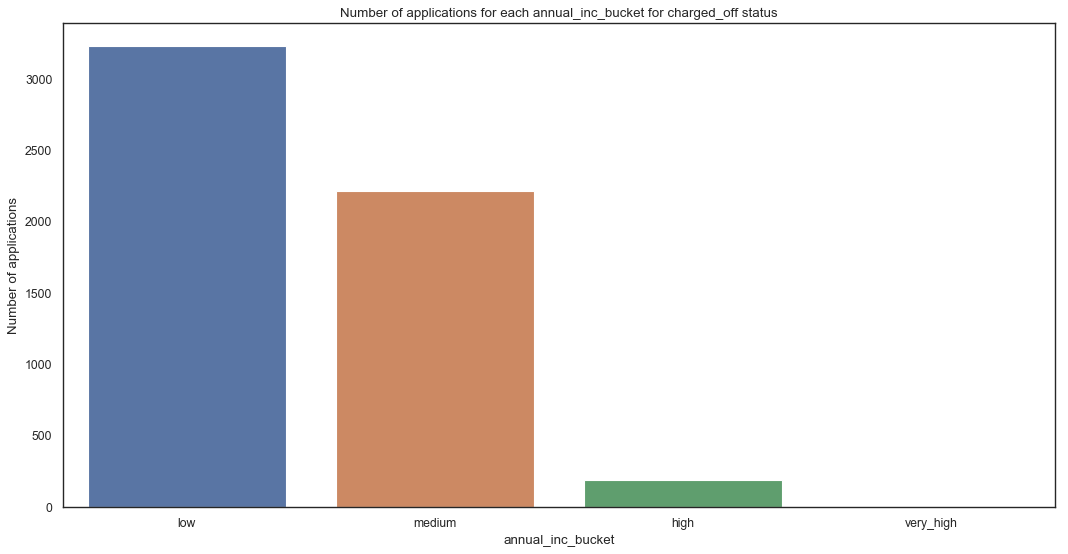

In [428]:
#Plotting Number of applications for each annual income bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='annual_inc_bucket', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each annual_inc_bucket for charged_off status")
plt.ylabel("Number of applications")
plt.show()

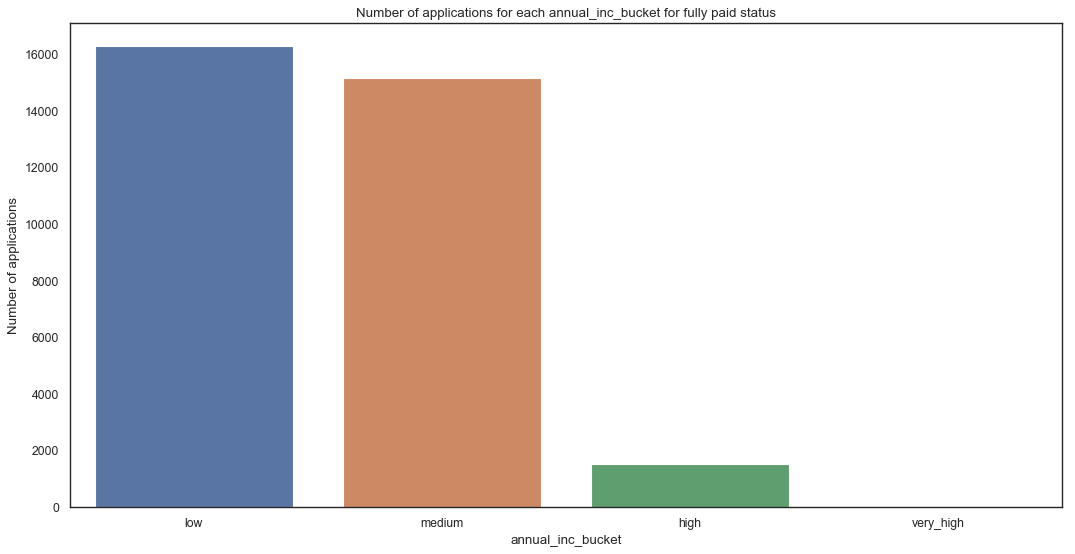

In [429]:
#Plotting Number of applications for each annual income bucket
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='annual_inc_bucket', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each annual_inc_bucket for fully paid status")
plt.ylabel("Number of applications")
plt.show()

In [430]:
charged_off['purpose'].describe()

count                   5627
unique                    14
top       debt_consolidation
freq                    2767
Name: purpose, dtype: object

In [431]:
fully_paid['purpose'].describe()

count                  32950
unique                    14
top       debt_consolidation
freq                   15288
Name: purpose, dtype: object

In [432]:
c_group = charged_off.groupby('purpose')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

purpose
renewable_energy       0.337658
vacation               0.941887
educational            0.995202
house                  1.048516
moving                 1.634974
wedding                1.706060
medical                1.883775
car                    2.843433
major_purchase         3.945264
home_improvement       6.166696
small_business         8.441443
credit_card            9.632131
other                 11.249334
debt_consolidation    49.173627
Name: member_id, dtype: float64

In [433]:
f_group = fully_paid.groupby('purpose')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

purpose
renewable_energy       0.251897
educational            0.816388
house                  0.934750
vacation               0.977238
moving                 1.468892
medical                1.745068
wedding                2.518968
small_business         3.881639
car                    4.063733
major_purchase         5.851290
home_improvement       7.672231
other                  9.808801
credit_card           13.611533
debt_consolidation    46.397572
Name: member_id, dtype: float64

From the above analysis we can see that customers who have applied for loan for the purpose of debt_consolidation has a higher likelihood of defaulting than paying the full loan

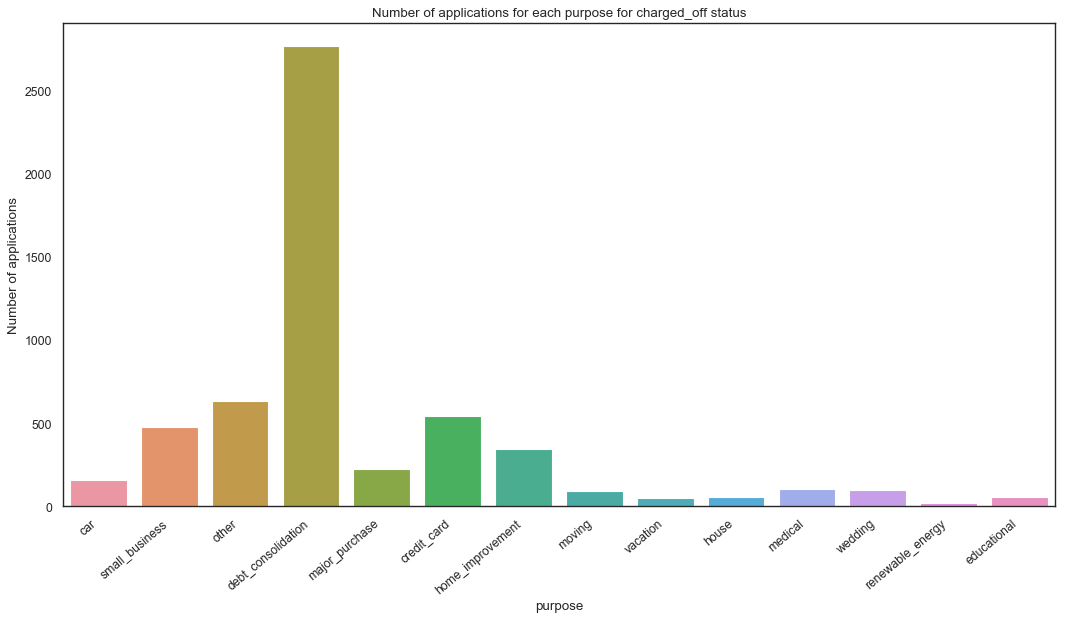

In [434]:
#Plotting Number of applications for each purpose
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='purpose', y='member_id',data=charged_off, estimator=len)
bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each purpose for charged_off status")
plt.ylabel("Number of applications")
plt.show()

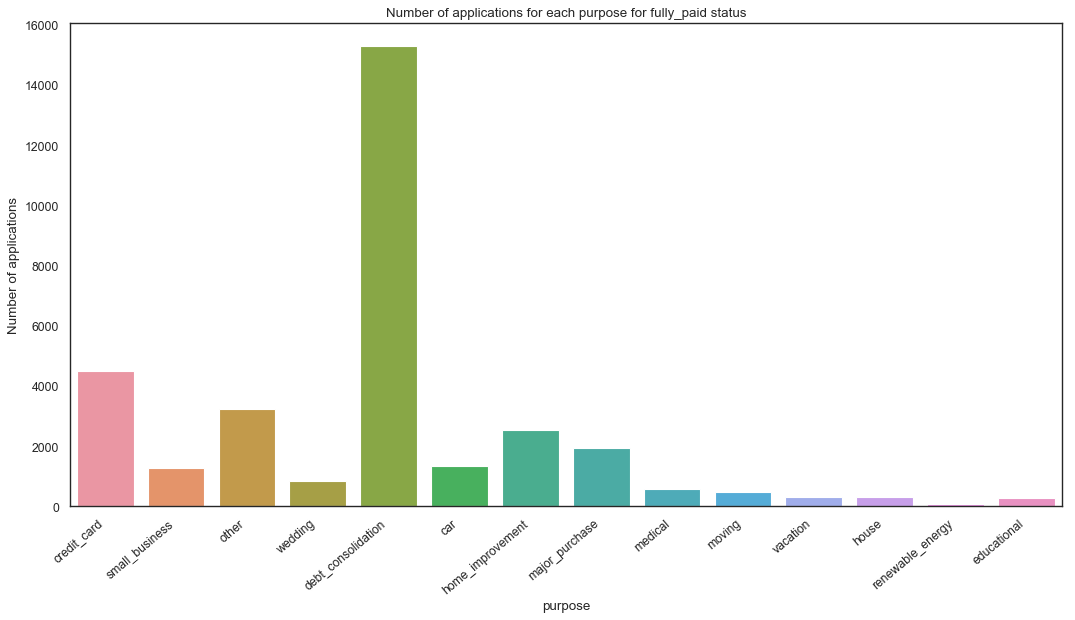

In [435]:
#Plotting Number of applications for each purpose
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='purpose', y='member_id',data=fully_paid, estimator=len)
bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each purpose for fully_paid status")
plt.ylabel("Number of applications")
plt.show()

In [436]:
charged_off['addr_state'].describe()

count     5627
unique      47
top         CA
freq      1125
Name: addr_state, dtype: object

In [437]:
fully_paid['addr_state'].describe()

count     32950
unique       50
top          CA
freq       5824
Name: addr_state, dtype: object

In [438]:
c_group = charged_off.groupby('addr_state')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

addr_state
ID     0.017771
TN     0.035543
MS     0.035543
NE     0.053314
WY     0.071086
VT     0.106629
MT     0.195486
DE     0.213258
SD     0.213258
DC     0.266572
AK     0.266572
WV     0.373201
NH     0.444286
RI     0.444286
AR     0.479829
HI     0.497601
NM     0.533144
KS     0.550915
UT     0.710858
OK     0.710858
KY     0.799716
LA     0.941887
AL     0.959659
WI     1.119602
SC     1.172916
OR     1.261774
MN     1.439488
CT     1.670517
CO     1.741603
MI     1.830460
NV     1.919318
MO     2.025946
NC     2.025946
AZ     2.185889
WA     2.256975
OH     2.754576
MA     2.825662
MD     2.878976
VA     3.145548
PA     3.198863
IL     3.500977
GA     3.820864
NJ     4.940466
TX     5.615781
NY     8.796872
FL     8.956815
CA    19.992891
Name: member_id, dtype: float64

In [439]:
f_group = fully_paid.groupby('addr_state')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

addr_state
NE     0.006070
ME     0.009105
ID     0.015175
IA     0.015175
IN     0.027314
TN     0.045524
MS     0.051593
VT     0.142640
SD     0.151745
AK     0.191199
MT     0.218513
WY     0.230653
DE     0.306525
HI     0.418816
NH     0.427921
WV     0.458270
NM     0.464340
RI     0.512898
DC     0.594841
AR     0.631259
UT     0.643399
KS     0.679818
OK     0.749621
KY     0.807284
OR     1.104704
NV     1.125948
LA     1.135053
WI     1.144158
AL     1.156297
SC     1.192716
MN     1.590288
MO     1.687405
MI     1.823976
CT     1.918058
NC     1.930197
CO     2.027314
WA     2.097117
AZ     2.203338
MD     2.613050
OH     3.104704
MA     3.453718
GA     3.471927
VA     3.617602
IL     3.887709
PA     3.908953
NJ     4.588771
FL     6.910470
TX     7.110774
NY     9.720789
CA    17.675266
Name: member_id, dtype: float64

From the above analysis we can see that people staying in California has a higher likelihood of defaulting than paying the full loan

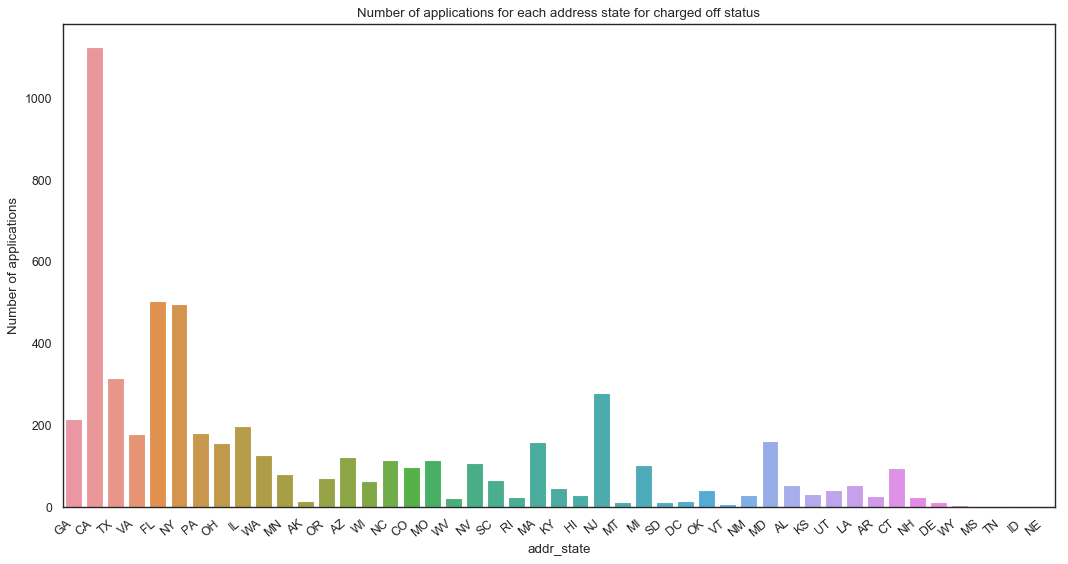

In [440]:
#Plotting Number of applications for each address state
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='addr_state', y='member_id',data=charged_off, estimator=len)
bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each address state for charged off status")
plt.ylabel("Number of applications")
plt.show()

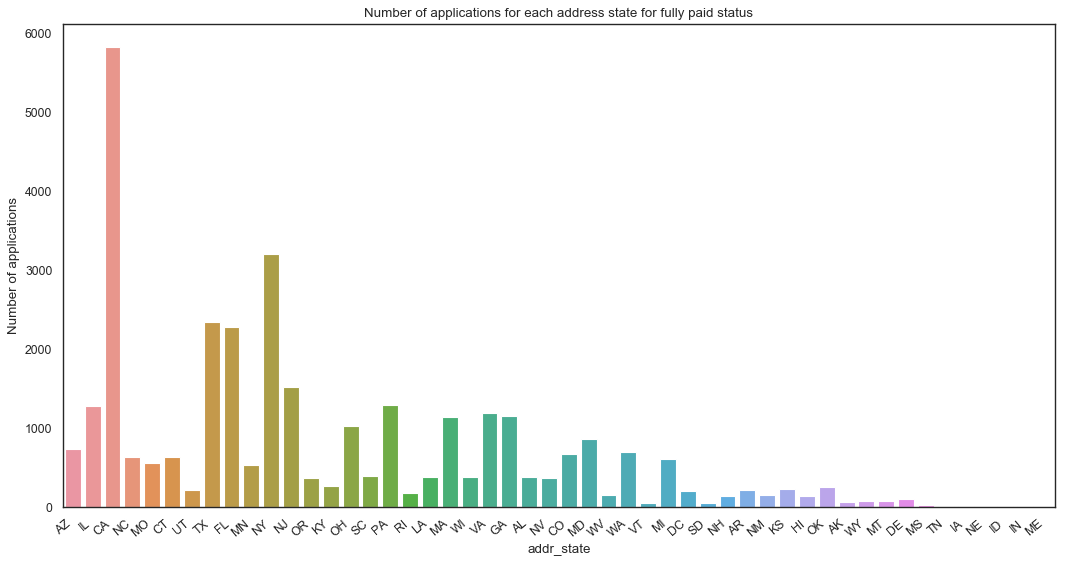

In [441]:
#Plotting Number of applications for each address state
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='addr_state', y='member_id',data=fully_paid, estimator=len)
bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each address state for fully paid status")
plt.ylabel("Number of applications")
plt.show()

In [442]:
charged_off['dti'].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [443]:
fully_paid['dti'].describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [444]:
c_group = charged_off.groupby('dti_bucket')['member_id'].count()
c_group.apply(lambda x : 100*x/len(charged_off.index)).sort_values()

dti_bucket
30+       0.000000
20-30    21.467923
<10      28.896392
10-20    49.635685
Name: member_id, dtype: float64

In [445]:
f_group = fully_paid.groupby('dti_bucket')['member_id'].count()
f_group.apply(lambda x : 100*x/len(fully_paid.index)).sort_values()

dti_bucket
30+       0.000000
20-30    18.257967
<10      34.230653
10-20    47.511381
Name: member_id, dtype: float64

From the above analysis we can see that as the dti is increasing from <10 to 30 there is shift from tendency of customer from defaulting the loan to fully paying the loan. Customer having a high dti has a higher likelihood of defaulting than paying the full loan

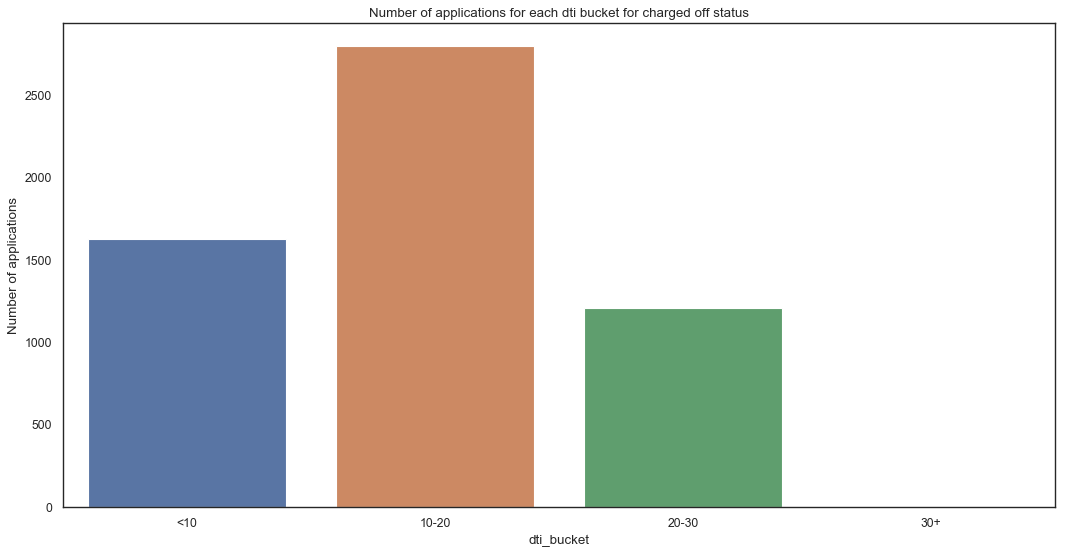

In [446]:
#Plotting Number of applications for each dti
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='dti_bucket', y='member_id',data=charged_off, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each dti bucket for charged off status")
plt.ylabel("Number of applications")
plt.show()

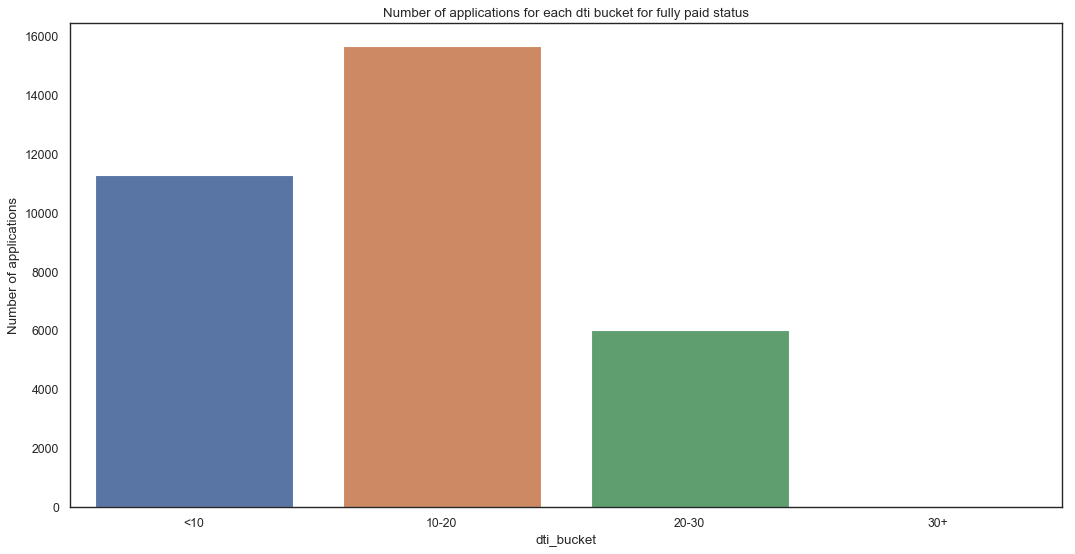

In [447]:
#Plotting Number of applications for each dti
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
bt = sns.barplot(x='dti_bucket', y='member_id',data=fully_paid, estimator=len)
#bt.set_xticklabels(bt.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of applications for each dti bucket for fully paid status")
plt.ylabel("Number of applications")
plt.show()

## Bivariate Analysis

Let's now do some bivariate analysis to understand some interesting trends. Considering Applicants annual income and the loan amount applied

In [448]:
paid_group = fully_paid.groupby(['annual_inc_bucket','loan_amnt_bucket'])['member_id'].count()
charged_off_group = charged_off.groupby(['annual_inc_bucket','loan_amnt_bucket'])['member_id'].count()
total_group = loan.groupby(['annual_inc_bucket','loan_amnt_bucket'])['member_id'].count()

In [449]:
(charged_off_group/total_group)*100


annual_inc_bucket  loan_amnt_bucket
high               10-20k               8.828829
                   20-30k              13.120567
                   30k+                14.056225
                   <10k                 9.144543
low                10-20k              18.065816
                   20-30k              25.252525
                   30k+                41.666667
                   <10k                15.128449
medium             10-20k              12.040035
                   20-30k              16.529430
                   30k+                25.285896
                   <10k                10.056809
very_high          20-30k                    NaN
                   <10k                      NaN
Name: member_id, dtype: float64

In the above table it is can be observed that, For Annual income 'Low' and Loan amount high i.e. 30k+, the candidate is more likely to not pay back the loan. 41.66% likely to default. 


In [450]:
(paid_group/total_group)*100

annual_inc_bucket  loan_amnt_bucket
low                <10k                 84.871551
                   10-20k               81.934184
                   20-30k               74.747475
                   30k+                 58.333333
medium             <10k                 89.943191
                   10-20k               87.959965
                   20-30k               83.470570
                   30k+                 74.714104
high               <10k                 90.855457
                   10-20k               91.171171
                   20-30k               86.879433
                   30k+                 85.943775
very_high          <10k                100.000000
                   20-30k              100.000000
Name: member_id, dtype: float64

In the above table it is can be observed that, For Annual income 'Low' and Loan amount high i.e. 30k+, the candidate is least likely to pay back the loan - 58.33%

In [451]:
(charged_off_group/paid_group)*100

annual_inc_bucket  loan_amnt_bucket
high               10-20k               9.683794
                   20-30k              15.102041
                   30k+                16.355140
                   <10k                10.064935
low                10-20k              22.049180
                   20-30k              33.783784
                   30k+                71.428571
                   <10k                17.825112
medium             10-20k              13.688086
                   20-30k              19.802704
                   30k+                33.843537
                   <10k                11.181291
very_high          20-30k                    NaN
                   <10k                      NaN
Name: member_id, dtype: float64

As observed in the obove table, Bad Loan to Good Loan ratio is relatively small for candidates with High and Very High  Incomes.

In [452]:
paid_group = fully_paid.groupby(['issue_d_year'])['int_rate'].mean()
charged_off_group = charged_off.groupby(['issue_d_year'])['int_rate'].mean()
total_group = loan.groupby(['issue_d_year'])['int_rate'].mean()

In [453]:
charged_off_group/paid_group

issue_d_year
07    1.157192
08    1.078675
09    1.088434
10    1.162407
11    1.232316
Name: int_rate, dtype: float64

Average Rate of Interest is more for each year, in case of charged off candidates. As seen in the above table the ratio of average rate of Interest for paid to charged off is >1 for all years.






In [454]:
loan.columns

Index(['member_id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'issue_d_month', 'issue_d_year', 'loan_amnt_bucket',
       'funded_amnt_bucket', 'funded_amnt_inv_bucket', 'int_rate_bucket',
       'annual_inc_bucket', 'dti_bucket'],
      dtype='object')

In [455]:
paid_group = fully_paid.groupby(['term','loan_amnt_bucket'])['member_id'].count()
charged_off_group = charged_off.groupby(['term','loan_amnt_bucket'])['member_id'].count()

In [456]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
charged_off_percent/fully_paid_percent

term  loan_amnt_bucket
36    <10k                0.761602
      10-20k              0.667184
      20-30k              0.775710
      30k+                0.610439
60    <10k                1.958887
      10-20k              1.972021
      20-30k              1.928268
      30k+                2.304902
Name: member_id, dtype: float64

From the above analysis we can see that a person is more likely to default than to pay the loan if the loan amount is higher and the term is higher

In [457]:
paid_group = fully_paid.groupby(['loan_amnt_bucket','purpose'])['member_id'].count()
charged_off_group = charged_off.groupby(['loan_amnt_bucket', 'purpose'])['member_id'].count()

In [458]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

loan_amnt_bucket  purpose           
30k+              medical               11.711392
                  small_business         4.078074
20-30k            educational            2.927848
                  small_business         2.455614
10-20k            small_business         2.210428
30k+              house                  2.091320
                  other                  1.999506
20-30k            renewable_energy       1.951899
30k+              debt_consolidation     1.865422
<10k              small_business         1.806067
20-30k            other                  1.527573
30k+              wedding                1.463924
10-20k            renewable_energy       1.330840
<10k              renewable_energy       1.301266
10-20k            vacation               1.301266
                  medical                1.286479
20-30k            debt_consolidation     1.255162
30k+              credit_card            1.250092
10-20k            educational            1.232778
<10k         

From the above analysis it can be seen that when a high loan is applied for medical and small_business , there is a high chance that person will default than not

In [459]:
paid_group = fully_paid.groupby(['annual_inc_bucket','int_rate_bucket'])['member_id'].count()
charged_off_group = charged_off.groupby(['annual_inc_bucket', 'int_rate_bucket'])['member_id'].count()

In [460]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

annual_inc_bucket  int_rate_bucket
low                15-20%             5.130211
medium             15-20%             3.357266
high               15-20%             2.399875
low                10-15%             2.205423
medium             10-15%             1.737720
high               10-15%             1.481997
low                5-10%              1.223480
medium             5-10%              0.832618
low                <5%                0.544168
high               5-10%              0.524993
medium             <5%                0.285616
high               <5%                0.243987
very_high          5-10%                   NaN
Name: member_id, dtype: float64

When the income level is low and interest rate is high than the customer is more likely to default

In [461]:
loan.columns

Index(['member_id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'issue_d_month', 'issue_d_year', 'loan_amnt_bucket',
       'funded_amnt_bucket', 'funded_amnt_inv_bucket', 'int_rate_bucket',
       'annual_inc_bucket', 'dti_bucket'],
      dtype='object')

In [462]:
paid_group = fully_paid.groupby(['loan_amnt_bucket','dti_bucket'])['member_id'].count()
charged_off_group = charged_off.groupby(['loan_amnt_bucket', 'dti_bucket'])['member_id'].count()

In [463]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

loan_amnt_bucket  dti_bucket
30k+              10-20         2.025834
                  20-30         1.991733
20-30k            20-30         1.482665
30k+              <10           1.296618
20-30k            10-20         1.234460
10-20k            20-30         1.202145
20-30k            <10           1.186090
<10k              20-30         1.045591
10-20k            10-20         1.042326
<10k              10-20         0.944989
10-20k            <10           0.815163
<10k              <10           0.776270
Name: member_id, dtype: float64

If the loan amount is very high that is 30k+ and dti bucket is between 10-30 than the applicant has a higher chance of defaulting than paying the loan

In [464]:
paid_group = fully_paid.groupby(['annual_inc_bucket','dti_bucket'])['member_id'].count()
charged_off_group = charged_off.groupby(['annual_inc_bucket', 'dti_bucket'])['member_id'].count()

In [465]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

annual_inc_bucket  dti_bucket
low                20-30         1.283621
                   10-20         1.201757
medium             20-30         1.030032
low                <10           1.011868
medium             10-20         0.894642
high               10-20         0.894476
                   20-30         0.809830
medium             <10           0.722221
high               <10           0.612094
very_high          <10                NaN
Name: member_id, dtype: float64

If the annual income bucket is low and dti bucket is between 10-30 than the applicant has a higher chance of defaulting than paying the loan

In [466]:
paid_group = fully_paid.groupby(['annual_inc_bucket','grade'])['member_id'].count()
charged_off_group = charged_off.groupby(['annual_inc_bucket', 'grade'])['member_id'].count()

In [467]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

annual_inc_bucket  grade
low                G        4.582718
                   F        3.064663
high               F        2.773751
medium             G        2.766470
                   F        2.730635
low                E        2.512733
high               E        2.059590
low                D        1.891655
medium             E        1.874288
                   D        1.455148
low                C        1.420880
high               G        1.171139
medium             C        1.061085
high               D        1.059009
low                B        0.992259
medium             B        0.643191
high               B        0.549362
low                A        0.513312
high               C        0.372101
medium             A        0.236866
high               A        0.157317
very_high          B             NaN
                   C             NaN
Name: member_id, dtype: float64

If the annual income bucket is low and the grade is very low that is G and F than the applicant has a higher chance of defaulting than paying the loan

In [468]:
paid_group = fully_paid.groupby(['purpose','grade'])['member_id'].count()
charged_off_group = charged_off.groupby(['purpose', 'grade'])['member_id'].count()

In [470]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

purpose             grade
medical             G        11.711392
car                 G         5.855696
house               F         5.855696
other               G         5.270126
small_business      G         4.729600
educational         E         4.391772
wedding             G         3.903797
house               E         3.903797
small_business      F         3.903797
house               G         3.903797
vacation            E         3.903797
car                 F         3.903797
debt_consolidation  F         3.264099
small_business      E         3.167835
debt_consolidation  G         3.009937
renewable_energy    F         2.927848
small_business      D         2.881861
educational         D         2.788427
other               E         2.683861
medical             F         2.602531
renewable_energy    C         2.439873
small_business      C         2.337459
debt_consolidation  E         2.185122
other               F         2.168776
small_business      B         2.108748

If the purpose of the loan is medical and grade is very low that is G than the applicant has a higher chance of defaulting than paying the loan

In [471]:
paid_group = fully_paid.groupby(['purpose','dti_bucket'])['member_id'].count()
charged_off_group = charged_off.groupby(['purpose', 'dti_bucket'])['member_id'].count()

In [472]:
charged_off_percent =100 * charged_off_group / len(charged_off.index)
fully_paid_percent = 100 * paid_group / len(fully_paid.index)
total_percent_ratio = charged_off_percent/fully_paid_percent
total_percent_ratio.sort_values(ascending = False)

purpose             dti_bucket
educational         20-30         2.545955
small_business      10-20         2.502642
                    20-30         2.357010
renewable_energy    10-20         1.899145
small_business      <10           1.881532
medical             20-30         1.482455
vacation            10-20         1.476654
renewable_energy    20-30         1.463924
house               10-20         1.439925
other               20-30         1.400275
moving              20-30         1.338445
educational         <10           1.262003
other               10-20         1.243390
debt_consolidation  20-30         1.218465
home_improvement    20-30         1.179272
medical             <10           1.150226
debt_consolidation  10-20         1.103018
moving              10-20         1.101567
                    <10           1.049606
other               <10           0.949572
educational         10-20         0.945920
vacation            20-30         0.929476
house               <10

If the purpose of the loan is educational and small_business and  dti bucket is between 10-30 than the applicant has a higher chance of defaulting than paying the loan

In [473]:
paid_group = fully_paid.groupby(['annual_inc_bucket','home_ownership'])['member_id'].count()
charged_off_group = charged_off.groupby(['annual_inc_bucket','home_ownership'])['member_id'].count()

In [474]:
#Function to return the topmost value for the ratio of charged off percentage and fully paid percentage
def getCombination(cog, fpg):
    charged_off_percent =100 * cog / len(charged_off.index)
    fully_paid_percent = 100 * fpg / len(fully_paid.index)
    total_percent_ratio = charged_off_percent/fully_paid_percent
    data = pd.DataFrame(total_percent_ratio.sort_values(ascending = False))
    data.rename(columns={'member_id': ''}, inplace=True)
    return data.iloc[:1,:]    

In [475]:
#Dropping columns for the next generalized function
loan.drop(['addr_state','loan_amnt','int_rate','sub_grade','annual_inc','issue_d','loan_status','issue_d_month','issue_d_year','dti','verification_status'], axis = 1, inplace=True)

In [476]:
#Print the pairwise columns charged off versus fully paid ratio
for left in loan.columns:
    for right in loan.columns:
        if left != "member_id" and right != "member_id" and left != right:
            paid_group = fully_paid.groupby([left,right])['member_id'].count()
            charged_off_group = charged_off.groupby([left,right])['member_id'].count()
            t = pd.DataFrame(getCombination(charged_off_group, paid_group))
            display(t)
    

,,
term,grade,
36,G,3.513417


,,
term,emp_length,
60,7,2.282129


,,
term,home_ownership,
60,OWN,2.315606


,,
term,purpose,
60,educational,4.55443


,,
term,loan_amnt_bucket,
60,30k+,2.304902


,,
term,funded_amnt_bucket,
60,30k+,2.270836


,,
term,funded_amnt_inv_bucket,
60,30k+,2.523343


,,
term,int_rate_bucket,
60,15-20%,3.702665


,,
term,annual_inc_bucket,
60,low,2.382973


,,
term,dti_bucket,
60,20-30,2.179858


,,
grade,term,
G,36,3.513417


,,
grade,emp_length,
G,1,14.05367


,,
grade,home_ownership,
G,OWN,6.441265


,,
grade,purpose,
G,medical,11.711392


,,
grade,loan_amnt_bucket,
G,10-20k,4.582718


,,
grade,funded_amnt_bucket,
G,<10k,4.524856


,,
grade,funded_amnt_inv_bucket,
G,<10k,5.855696


,,
grade,int_rate_bucket,
E,15-20%,4.063136


,,
grade,annual_inc_bucket,
G,low,4.582718


,,
grade,dti_bucket,
G,20-30,3.603505


,,
emp_length,term,
7,60,2.282129


,,
emp_length,grade,
1,G,14.05367


,,
emp_length,home_ownership,
7,OTHER,2.927848


,,
emp_length,purpose,
8,renewable_energy,5.855696


,,
emp_length,loan_amnt_bucket,
7,30k+,3.016571


,,
emp_length,funded_amnt_bucket,
7,30k+,2.833401


,,
emp_length,funded_amnt_inv_bucket,
7,30k+,2.47741


,,
emp_length,int_rate_bucket,
1,15-20%,5.621468


,,
emp_length,annual_inc_bucket,
10+,low,1.370482


,,
emp_length,dti_bucket,
1,20-30,1.35728


,,
home_ownership,term,
OWN,60,2.315606


,,
home_ownership,grade,
OWN,G,6.441265


,,
home_ownership,emp_length,
OTHER,7,2.927848


,,
home_ownership,purpose,
OTHER,car,5.855696


,,
home_ownership,loan_amnt_bucket,
OTHER,20-30k,3.513417


,,
home_ownership,funded_amnt_bucket,
OTHER,20-30k,4.391772


,,
home_ownership,funded_amnt_inv_bucket,
OTHER,10-20k,3.39014


,,
home_ownership,int_rate_bucket,
OWN,15-20%,5.855696


,,
home_ownership,annual_inc_bucket,
OTHER,high,1.463924


,,
home_ownership,dti_bucket,
OTHER,10-20,1.951899


,,
purpose,term,
educational,60,4.55443


,,
purpose,grade,
medical,G,11.711392


,,
purpose,emp_length,
renewable_energy,8,5.855696


,,
purpose,home_ownership,
car,OTHER,5.855696


,,
purpose,loan_amnt_bucket,
medical,30k+,11.711392


,,
purpose,funded_amnt_bucket,
medical,30k+,11.711392


,,
purpose,funded_amnt_inv_bucket,
medical,30k+,11.711392


,,
purpose,int_rate_bucket,
medical,15-20%,9.759493


,,
purpose,annual_inc_bucket,
small_business,low,2.496788


,,
purpose,dti_bucket,
educational,20-30,2.545955


,,
loan_amnt_bucket,term,
30k+,60,2.304902


,,
loan_amnt_bucket,grade,
10-20k,G,4.582718


,,
loan_amnt_bucket,emp_length,
30k+,7,3.016571


,,
loan_amnt_bucket,home_ownership,
20-30k,OTHER,3.513417


,,
loan_amnt_bucket,purpose,
30k+,medical,11.711392


,,
loan_amnt_bucket,funded_amnt_bucket,
30k+,10-20k,2.732658


,,
loan_amnt_bucket,funded_amnt_inv_bucket,
30k+,<10k,3.513417


,,
loan_amnt_bucket,int_rate_bucket,
10-20k,15-20%,4.570299


,,
loan_amnt_bucket,annual_inc_bucket,
30k+,low,4.18264


,,
loan_amnt_bucket,dti_bucket,
30k+,10-20,2.025834


,,
funded_amnt_bucket,term,
30k+,60,2.270836


,,
funded_amnt_bucket,grade,
<10k,G,4.524856


,,
funded_amnt_bucket,emp_length,
30k+,7,2.833401


,,
funded_amnt_bucket,home_ownership,
20-30k,OTHER,4.391772


,,
funded_amnt_bucket,purpose,
30k+,medical,11.711392


,,
funded_amnt_bucket,loan_amnt_bucket,
10-20k,30k+,2.732658


,,
funded_amnt_bucket,funded_amnt_inv_bucket,
30k+,<10k,3.513417


,,
funded_amnt_bucket,int_rate_bucket,
10-20k,15-20%,4.291503


,,
funded_amnt_bucket,annual_inc_bucket,
30k+,low,5.437432


,,
funded_amnt_bucket,dti_bucket,
30k+,20-30,1.936529


,,
funded_amnt_inv_bucket,term,
30k+,60,2.523343


,,
funded_amnt_inv_bucket,grade,
<10k,G,5.855696


,,
funded_amnt_inv_bucket,emp_length,
30k+,7,2.47741


,,
funded_amnt_inv_bucket,home_ownership,
10-20k,OTHER,3.39014


,,
funded_amnt_inv_bucket,purpose,
30k+,medical,11.711392


,,
funded_amnt_inv_bucket,loan_amnt_bucket,
<10k,30k+,3.513417


,,
funded_amnt_inv_bucket,funded_amnt_bucket,
<10k,30k+,3.513417


,,
funded_amnt_inv_bucket,int_rate_bucket,
30k+,15-20%,4.511766


,,
funded_amnt_inv_bucket,annual_inc_bucket,
30k+,low,4.55443


,,
funded_amnt_inv_bucket,dti_bucket,
30k+,20-30,2.016962


,,
int_rate_bucket,term,
15-20%,60,3.702665


,,
int_rate_bucket,grade,
15-20%,E,4.063136


,,
int_rate_bucket,emp_length,
15-20%,1,5.621468


,,
int_rate_bucket,home_ownership,
15-20%,OWN,5.855696


,,
int_rate_bucket,purpose,
15-20%,medical,9.759493


,,
int_rate_bucket,loan_amnt_bucket,
15-20%,10-20k,4.570299


,,
int_rate_bucket,funded_amnt_bucket,
15-20%,10-20k,4.291503


,,
int_rate_bucket,funded_amnt_inv_bucket,
15-20%,30k+,4.511766


,,
int_rate_bucket,annual_inc_bucket,
15-20%,low,5.130211


,,
int_rate_bucket,dti_bucket,
15-20%,10-20,3.936602


,,
annual_inc_bucket,term,
low,60,2.382973


,,
annual_inc_bucket,grade,
low,G,4.582718


,,
annual_inc_bucket,emp_length,
low,10+,1.370482


,,
annual_inc_bucket,home_ownership,
high,OTHER,1.463924


,,
annual_inc_bucket,purpose,
low,small_business,2.496788


,,
annual_inc_bucket,loan_amnt_bucket,
low,30k+,4.18264


,,
annual_inc_bucket,funded_amnt_bucket,
low,30k+,5.437432


,,
annual_inc_bucket,funded_amnt_inv_bucket,
low,30k+,4.55443


,,
annual_inc_bucket,int_rate_bucket,
low,15-20%,5.130211


,,
annual_inc_bucket,dti_bucket,
low,20-30,1.283621


,,
dti_bucket,term,
20-30,60,2.179858


,,
dti_bucket,grade,
20-30,G,3.603505


,,
dti_bucket,emp_length,
20-30,1,1.35728


,,
dti_bucket,home_ownership,
10-20,OTHER,1.951899


,,
dti_bucket,purpose,
20-30,educational,2.545955


,,
dti_bucket,loan_amnt_bucket,
10-20,30k+,2.025834


,,
dti_bucket,funded_amnt_bucket,
20-30,30k+,1.936529


,,
dti_bucket,funded_amnt_inv_bucket,
20-30,30k+,2.016962


,,
dti_bucket,int_rate_bucket,
10-20,15-20%,3.936602


,,
dti_bucket,annual_inc_bucket,
20-30,low,1.283621


From the bivariate analysis we can see that when the loan application is for higher loan amount , the annual income is low , the interest rate is high, the purpose is medical, educational or small_business, the grade is on the lower side, the dti bucket is higher the applicant is more likely to default